<a href="https://colab.research.google.com/github/theaok/datManPy/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our data management :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

In [1]:
#---------------------------SETUP----------------------------------
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import missingno as msno

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
data_table.max_columns = 50
#!and may have to click at top right spreadsheet icon

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas


data management is often most of the research project actually! i'd say anywhere 30-95%, probably 50-80% eg see pie charts at the top:
https://www.kdnuggets.com/2023/08/7-steps-mastering-data-cleaning-preprocessing-techniques.html

**DAT MAN: pandas, like stata, your lib for all data mgmt, much stats and vis)**

pandas helps a lot with traditional/2d data, kind of like r or stata, and quite unlike the rest of Py

there are no textbooks for this course, but if you like to have a textbook:

https://wesmckinney.com/book/ by creator of pandas, detailed, thorough

https://jakevdp.github.io/PythonDataScienceHandbook/ little dated but great


<br> cheat sheets:

https://github.com/theaok/data/blob/main/Pandas_Cheat_Sheet.pdf

https://github.com/theaok/data/blob/main/Data_Wrangling_Cheat_Sheet.pdf

https://github.com/theaok/Data-Science-Cheatsheet


<br>REFS:

https://www.youtube.com/watch?v=5rNu16O3YNE&t=3676s

http://www.dataschool.io/best-python-pandas-resources/

https://www.dataquest.io/blog/pandas-python-tutorial/

many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html


<br>for stata users:

https://www.danielmsullivan.com/pages/tutorial_stata_to_python.html

https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html and on the left there's also r, sas, spreadsheet

https://aeturrell.github.io/coding-for-economists/coming-from-stata.html

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/

<br>tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data

https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats  

https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization

<br>for afficionados: https://jakevdp.github.io/PythonDataScienceHandbook/
eg it shows how pandas builds on numpy and whats under the hood


### [jan21] dive into python: load real data (csv file), and basics                                                

(note!: can collapse sec and run all cells at once)

any software incl excel and spss can save as csv,    just make sure it is clean: one short alphanumeric header per column                                                                                                                                                                  
let's do an example, your first ps will be sth like that but using your own data                                                             



In [2]:
#download file from online and save in colab as ex1.csv; note it's from: https://conjointly.com/kb/correlation-statistic/
#urllib.request.urlretrieve("https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download", "ex1.csv")
!wget -q -O ex1.csv https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download

In [3]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
ex1.csv  sample_data


In [4]:
dat=pd.read_csv('ex1.csv') #read it in  ; or full path: '/content/ex1.csv'

In [5]:
dat.columns #list var names

Index(['Person', 'Height', 'Self Esteem'], dtype='object')

In [ ]:
dat.head(2)
dat.tail(2)

Person  Height  Self Esteem
0       1      68          4.1
1       2      71          4.6

Person  Height  Self Esteem
18      19      63          3.4
19      20      61          3.6

In [ ]:
dat #get spreadsheet view: can sort on cols, filter, and copy

Person  Height  Self Esteem
0        1      68          4.1
1        2      71          4.6
2        3      62          3.8
3        4      75          4.4
4        5      58          3.2
5        6      60          3.1
6        7      67          3.8
7        8      68          4.1
8        9      71          4.3
9       10      69          3.7
10      11      68          3.5
11      12      67          3.2
12      13      63          3.7
13      14      62          3.3
14      15      60          3.4
15      16      63          4.0
16      17      65          4.1
17      18      67          3.8
18      19      63          3.4
19      20      61          3.6

In [ ]:
dat["Height"][0:3] #subset or slice

0    68
1    71
2    62
Name: Height, dtype: int64

In [ ]:
#keep it simple! especially when figuring things out! keep only vars needed, say 5 or 10
#dont have a dataset with 500vars--you won't use them! just clutter and mess!
#and then later whenever you need more vars, just rerun the code retaining more
dat[["Height","Self Esteem"]][0:3]

Height  Self Esteem
0      68          4.1
1      71          4.6
2      62          3.8

In [ ]:
# if data big take random sample! way better to learn and figure things out with small sample!!
# say frac=.1 for 10perc, or n=10 for 10obs
dat.sample(frac=0.5, replace=False, random_state=1) #random_state to ensure reproducibility of results;

Person  Height  Self Esteem
3        4      75          4.4
16      17      65          4.1
6        7      67          3.8
10      11      68          3.5
2        3      62          3.8
14      15      60          3.4
4        5      58          3.2
17      18      67          3.8
7        8      68          4.1
1        2      71          4.6

In [ ]:
#dat["Height"]

In [ ]:
dat["Height"].mean() # median, mode, stdev

65.4

In [ ]:
dat["Height"].value_counts(dropna=False) #.nlargest(3) a tab or freq table

Height
68    3
67    3
63    3
71    2
62    2
60    2
75    1
58    1
69    1
65    1
61    1
Name: count, dtype: int64

<Axes: >

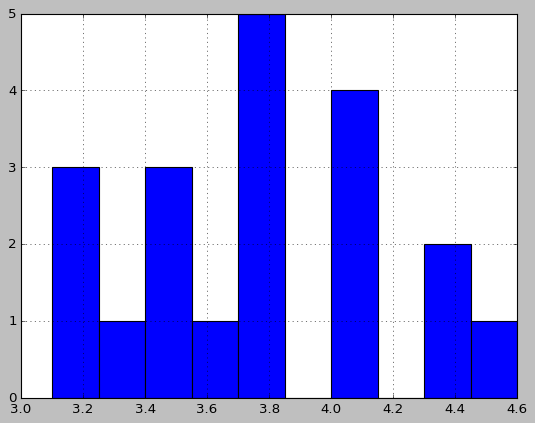

In [ ]:
dat["Self Esteem"].hist() #again, always interpret all output

In [ ]:
pd.crosstab(dat["Height"], dat["Self Esteem"]) #too many numbers for a crosstab!

Self Esteem  3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  4.0  4.1  4.3  4.4  4.6
Height                                                                      
58             0    1    0    0    0    0    0    0    0    0    0    0    0
60             1    0    0    1    0    0    0    0    0    0    0    0    0
61             0    0    0    0    0    1    0    0    0    0    0    0    0
62             0    0    1    0    0    0    0    1    0    0    0    0    0
63             0    0    0    1    0    0    1    0    1    0    0    0    0
65             0    0    0    0    0    0    0    0    0    1    0    0    0
67             0    1    0    0    0    0    0    2    0    0    0    0    0
68             0    0    0    0    1    0    0    0    0    2    0    0    0
69             0    0    0    0    0    0    1    0    0    0    0    0    0
71             0    0    0    0    0    0    0    0    0    0    1    0    1
75             0    0    0    0    0    0    0    0    0    0    0    1    0

<Axes: xlabel='Height', ylabel='Self Esteem'>

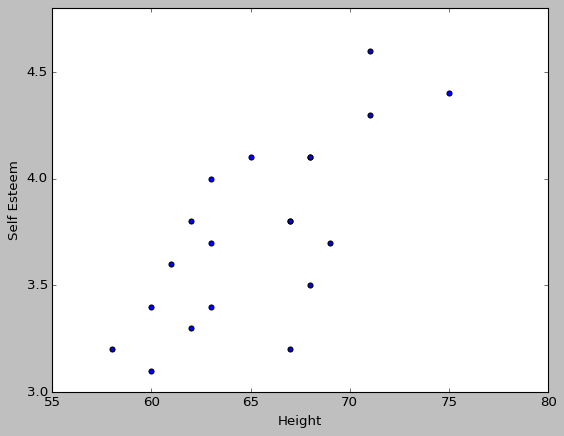

In [ ]:
dat.plot(kind='scatter', y='Self Esteem', x='Height')

In [ ]:
dat[['Height','Self Esteem']].corr().round(2)

Height  Self Esteem
Height         1.00         0.73
Self Esteem    0.73         1.00

### [jan28] I/O import/export
can import-export ~20 formats eg csv, json, xml, xls, stata, sas:
https://pandas.pydata.org/docs/user_guide/io.html

if you work a lot with xls check out:

https://realpython.com/openpyxl-excel-spreadsheets-python/

https://automatetheboringstuff.com/chapter12/


you can mount google drive here, create sheets etc
https://colab.research.google.com/notebooks/io.ipynb and https://colab.research.google.com/notebooks/snippets/sheets.ipynb

In [6]:
#lets start with html, and especially handy wikipedia
#for match use header of col; ideally unique; case may matter
pd.read_html('https://en.wikipedia.org/wiki/List_of_counties_in_New_Jersey',match='Density',flavor=None)[0].head(3)

County  FIPS code[12] County seat[13]  \
0    Atlantic County              1    Mays Landing   
1      Bergen County              3      Hackensack   
2  Burlington County              5     Mount Holly   

             Largest City[14]  Est.[13]  \
0  Egg Harbor Township 47,842      1837   
1           Hackensack 46,030      1683   
2     Evesham Township 46,826      1694   

                                   Formed from[6][7]  \
0                                  Gloucester County   
1  One of four original counties created in East ...   
2  One of two original counties created in West J...   

                                       Named for[15]  Density (per mi2)  \
0  The Atlantic Ocean, which forms the county's e...             490.58   
1                  Bergen, New Netherland settlement            4092.89   
2  The old ancient name for an inland market near...             582.82   

   Pop.[16]               Area[13]  Map  
0    275213  561 sq mi (1,453 km2)  NaN  
1    957736    234 sq mi (606 km2)  NaN  
2    469167  805 sq mi (2,085 km2)  NaN

In [9]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_towns_in_India_by_population',match="Population")[0].head(5)
#pd.read_html("https://en.wikipedia.org/wiki/Premier_League", match = "Position")[0].head(3)
#https://towardsdatascience.com/how-to-use-wikipedia-as-a-data-source-3dfea29e6539
#https://towardsdatascience.com/2-easy-ways-to-get-tables-from-a-website-with-pandas-b92fc835e741 some more ideas
#https://towardsdatascience.com/all-pandas-read-html-you-should-know-for-scraping-data-from-html-tables-a3cbb5ce8274
#https://pbpython.com/pandas-html-table.html

#note if bunch of tables and or cant easily fetch teh right one, just fetch them all
#and then select the right one
#tables=pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
#tables[0]
#tables[1]
#etc

Town          State  Type  Population  Ref
0  Achhnera  Uttar Pradesh  N.P.       22781  NaN
1    Adalaj        Gujarat  C.T.       11957  NaN
2     Adoor         Kerala     M       29171  NaN
3     Adyar      Karnataka  C.T.        7034  NaN
4      Adra    West Bengal  C.T.       14956  NaN

In [10]:
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
# index is the key or id var.get_group
auto=pd.read_stata('auto.dta') #,index_col='make' load stata data
auto.head(2)
#useful to set index to sth meaningful as opposed to 0,1,2
#auto = auto.set_index('make')

#auto.to_stata('stata.dta') #save as stata data

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0  AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1    AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   

   displacement  gear_ratio   foreign  
0           121        3.58  Domestic  
1           258        2.53  Domestic

In [11]:
auto.to_excel('auto.xlsx', sheet_name = 'testing', index = False) #save as xls
excelTest1 = pd.read_excel('auto.xlsx', 0) #skiprows=3 #useful! often couple first rows are junk!
# or there is also header option: eg: header = 1
excelTest1.head(2)
excelTest1.tail(2)

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0  AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1    AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   

   displacement  gear_ratio   foreign  
0           121        3.58  Domestic  
1           258        2.53  Domestic

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
72  VW Scirocco   6850   25    4.0       2.0     16    1990     156    36   
73    Volvo 260  11995   17    5.0       2.5     14    3170     193    37   

    displacement  gear_ratio  foreign  
72            97        3.78  Foreign  
73           163        2.98  Foreign

In [ ]:
files.download('auto.xlsx') #download from colab/goog cloud onto your local hd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
#sometimes header is not in 1st row
pd.read_csv("https://raw.githubusercontent.com/theaok/data/main/egHeaderNot1stRow.csv",header=2).head()

County Code County Name  District Code  \
0          01    Atlantic           10.0   
1          01    Atlantic          110.0   
2          01    Atlantic          120.0   
3          01    Atlantic          125.0   
4          01    Atlantic          570.0   

                                      District Name  Total Enrollment  White  \
0                   Absecon Public Schools District             887.0  447.0   
1                     Atlantic City School District            6450.0  265.0   
2        Atlantic County Vocational School District            1713.0  516.0   
3  Atlantic County Special Services School District             306.0   95.0   
4                 Brigantine Public School District             444.0  314.0   

   %White   Black  %Black  Hispanic  ...  Tenth Grade  Eleventh Grade  \
0    50.4   133.0    15.0     208.0  ...          0.0             0.0   
1     4.1  2147.0    33.3    2847.0  ...        462.0           405.0   
2    30.1   296.0    17.3     721.0  ...        399.0           355.0   
3    31.0    82.0    26.8     108.0  ...          3.0             5.0   
4    70.7    18.0     4.1      62.0  ...          0.0             0.0   

   Twelfth Grade  Ungraded  %Free Lunch  %Reduced Lunch  %English Learners  \
0            0.0      25.0         40.8             5.9                8.7   
1          369.0     286.0         81.5             3.6               16.1   
2          362.0     160.0         48.6             9.6                0.0   
3           13.0     244.0         39.5             5.9                0.3   
4            0.0      12.0         33.8             8.3                3.4   

   %Migrant  %Military  %Homeless  
0       0.0        0.8        0.2  
1       0.0        0.0        2.2  
2       0.0        2.5        0.6  
3       0.0        0.3        1.0  
4       0.0        2.3        0.5  

[5 rows x 42 columns]

note: python can download files from online as above, but it can also upload, say to github:
https://stackoverflow.com/questions/63427607/python-upload-files-directly-to-github-using-pygithub

### [jan28] basic descriptive stats [TODO combine/reshuffle with manipulation]
(more later under visualization)

descriptive statistics (and visualization) are key to understanding data; and understanding data is key to successful data management!!! use it a lot and make notes (text fields and or comments)

In [13]:
auto.dtypes

make              object
price              int16
mpg                int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [14]:
auto.select_dtypes(include='float') #includes all float, eg 64 32; can also exclude=; and can pass a list not just one item

rep78  headroom  gear_ratio
0     3.0       2.5        3.58
1     3.0       3.0        2.53
2     NaN       3.0        3.08
3     3.0       4.5        2.93
4     4.0       4.0        2.41
..    ...       ...         ...
69    4.0       2.5        3.74
70    5.0       3.0        3.78
71    4.0       3.0        3.78
72    4.0       2.0        3.78
73    5.0       2.5        2.98

[74 rows x 3 columns]

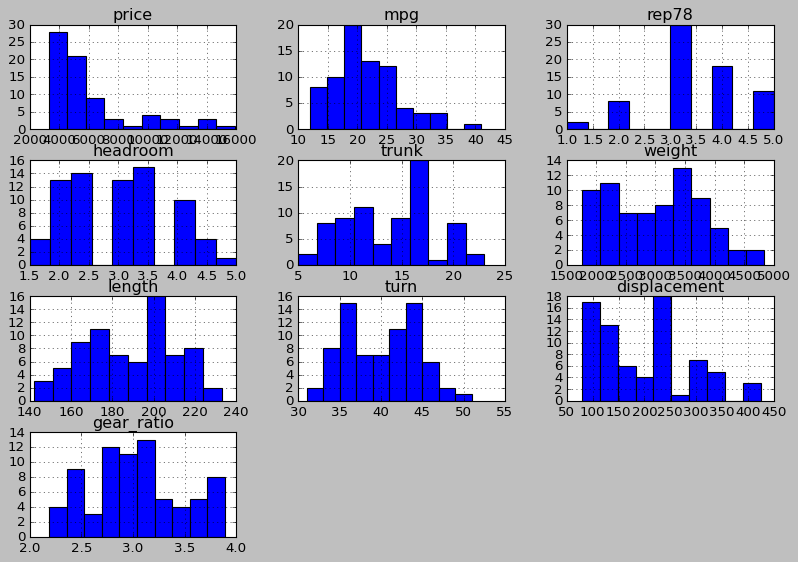

In [15]:
#dir(auto) # all the stuff you can do on auto :)
#dir(auto.price) #and stuff you can do on price var
auto.hist(figsize=(12,8)); # eg hist

In [ ]:
#auto['make'][0] #py counts from zero!
auto['make'][0:3]
#auto[['weight', 'length']][0:3]   #note that need to double [[ ]]

0    AMC Concord
1      AMC Pacer
2     AMC Spirit
Name: make, dtype: object

In [ ]:
# can also use loc or iloc to subset/slice on both rows and cols
#auto.iloc[0:3,0] #first three rows, 1st var
#auto.loc[:, 'make':'weight']
#auto.loc[:, ['make','weight']]
auto.loc[0:2,'make']
#auto.iloc[[0,1,2],0]

0    AMC Concord
1      AMC Pacer
2     AMC Spirit
Name: make, dtype: object

In [ ]:
max(auto['mpg'])
print() #just add space
min(auto['mpg'])
#auto['mpg'].max()
#auto['mpg'].min()
#auto['mpg'].median()
#auto['mpg'].mean()
#auto['mpg'].std()

41

12

In [ ]:
#subsetting on condition
auto.make[auto.mpg<15]
#auto['make'][auto['mpg']<15]
#auto.make[auto.mpg.isin([11,12,13,14])]

10         Cad. Deville
11        Cad. Eldorado
25    Linc. Continental
26         Linc. Mark V
27     Linc. Versailles
29         Merc. Cougar
32           Merc. XR-7
63          Peugeot 604
Name: make, dtype: object

In [ ]:
auto.make[(auto.mpg<15) | (auto.mpg>40)] #https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior

10         Cad. Deville
11        Cad. Eldorado
25    Linc. Continental
26         Linc. Mark V
27     Linc. Versailles
29         Merc. Cougar
32           Merc. XR-7
63          Peugeot 604
70            VW Diesel
Name: make, dtype: object

In [ ]:
#subsetting using query
#auto.query("mpg<15  & foreign=='Foreign'")
#auto.query("weight <2000 | length <150")
auto.query("weight + length <2000")

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
23     Ford Fiesta   4389   28    4.0       1.5      9    1800     147    33   
42     Plym. Champ   4425   34    5.0       2.5     11    1800     157    37   
61     Honda Civic   4499   28    4.0       2.5      5    1760     149    34   
64  Renault Le Car   3895   26    3.0       3.0     10    1830     142    34   

    displacement  gear_ratio   foreign  
23            98        3.15  Domestic  
42            86        2.97  Domestic  
61            91        3.30   Foreign  
64            79        3.72   Foreign

In [ ]:
a=auto.set_index('make') #good idea to set index to sth meaningful

In [ ]:
a.loc['Honda Civic','mpg']
#a.loc[:'Honda Civic',:'mpg'] #all rows upto civic and cols upto mpg

28

In [ ]:
a.loc[a.mpg>40,'price']

make
VW Diesel    5397
Name: price, dtype: int16

In [ ]:
a.loc[["Honda Civic", "Ford Fiesta"]]['mpg']

make
Honda Civic    28
Ford Fiesta    28
Name: mpg, dtype: int16

In [ ]:
a.loc[(a.foreign == 'Foreign') & (a.mpg > 30)]

price  mpg  rep78  headroom  trunk  weight  length  turn  \
make                                                                       
Datsun 210       4589   35    5.0       2.0      8    2020     165    32   
Subaru           3798   35    5.0       2.5     11    2050     164    36   
Toyota Corolla   3748   31    5.0       3.0      9    2200     165    35   
VW Diesel        5397   41    5.0       3.0     15    2040     155    35   

                displacement  gear_ratio  foreign  
make                                               
Datsun 210                85        3.70  Foreign  
Subaru                    97        3.81  Foreign  
Toyota Corolla            97        3.21  Foreign  
VW Diesel                 90        3.78  Foreign

In [ ]:
b=a.drop(index=["Honda Civic", "Ford Fiesta"])
len(a);print();len(b)

74

72

In [ ]:
#len(auto)
auto.shape #74 obs, 12 vars

(74, 12)

In [ ]:
auto.dtypes #note: not 'str' but 'object' and 'category';

# Use a category when there is lots of repetition that you expect to exploit.
# A string variable consisting of only a few different values
# As a signal to other Python libraries that this column should be treated as a
#categorical variable (e.g. to use suitable statistical methods or plot types).

#https://wesmckinney.com/book/data-cleaning#pandas-categorical

make              object
price              int16
mpg                int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
auto.select_dtypes(include = ['float32']).head(2)

headroom  gear_ratio
0       2.5        3.58
1       3.0        2.53

In [ ]:
#auto.filter(like='wei').head(2) #stata: lookfor wei
auto.filter(regex='.*t$').head(2)

weight  displacement
0    2930           121
1    3350           258

In [ ]:
auto.make.str.contains('Honda').sum()


2

In [ ]:
auto.make.str.contains('.*nda').sum()


2

In [ ]:
auto.make[0:5] #note dtype

0      AMC Concord
1        AMC Pacer
2       AMC Spirit
3    Buick Century
4    Buick Electra
Name: make, dtype: object

In [ ]:
auto.foreign[0:5] #note dtype and categories

0    Domestic
1    Domestic
2    Domestic
3    Domestic
4    Domestic
Name: foreign, dtype: category
Categories (2, object): ['Domestic' < 'Foreign']

In [ ]:
#auto.describe()
auto.describe().T.round(2) #T just transposes

count     mean      std      min      25%      50%      75%  \
price          74.0  6165.26  2949.50  3291.00  4220.25  5006.50  6332.25   
mpg            74.0    21.30     5.79    12.00    18.00    20.00    24.75   
rep78          69.0     3.41     0.99     1.00     3.00     3.00     4.00   
headroom       74.0     2.99     0.85     1.50     2.50     3.00     3.50   
trunk          74.0    13.76     4.28     5.00    10.25    14.00    16.75   
weight         74.0  3019.46   777.19  1760.00  2250.00  3190.00  3600.00   
length         74.0   187.93    22.27   142.00   170.00   192.50   203.75   
turn           74.0    39.65     4.40    31.00    36.00    40.00    43.00   
displacement   74.0   197.30    91.84    79.00   119.00   196.00   245.25   
gear_ratio     74.0     3.01     0.46     2.19     2.73     2.96     3.35   
mpgNU          74.0    21.30     5.79    12.00    18.00    20.00    24.75   
colOfOnes      74.0     2.11     0.93     2.00     2.00     2.00     2.00   

                   max  
price         15906.00  
mpg              41.00  
rep78             5.00  
headroom          5.00  
trunk            23.00  
weight         4840.00  
length          233.00  
turn             51.00  
displacement    425.00  
gear_ratio        3.89  
mpgNU            41.00  
colOfOnes        10.00

In [ ]:
###groupby/agg
#https://wesmckinney.com/book/data-aggregation

auto[['price','mpg','foreign']].groupby('foreign').describe().round(2)
#auto[['price','mpg','foreign']].groupby('foreign').median()

price                                                             \
         count     mean      std     min     25%     50%     75%      max   
foreign                                                                     
Domestic  52.0  6072.42  3097.10  3291.0  4185.5  4782.5  6199.5  15906.0   
Foreign   22.0  6384.68  2621.92  3748.0  4521.5  5759.0  7067.5  12990.0   

           mpg                                              
         count   mean   std   min    25%   50%   75%   max  
foreign                                                     
Domestic  52.0  19.83  4.74  12.0  16.75  19.0  22.0  34.0  
Foreign   22.0  24.77  6.61  14.0  21.00  24.5  27.5  41.0

In [ ]:
#auto[['make', 'price', 'mpg', 'rep78', 'foreign']].head(3) #first 3 obs
auto.sort_values(by='mpg')[['mpg','make','price']][0:3] #3 cars with lowest mpg

mpg               make  price
26   12       Linc. Mark V  13594
25   12  Linc. Continental  11497
29   14       Merc. Cougar   5379

<Axes: >

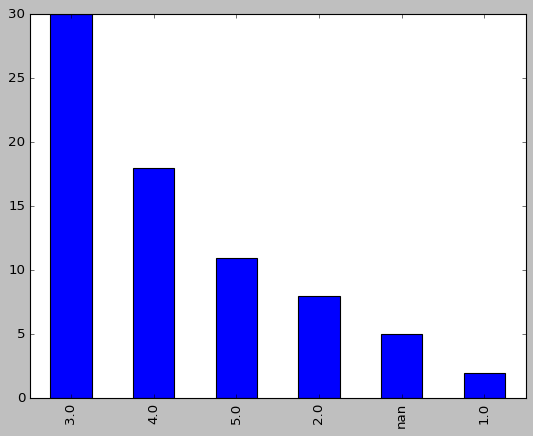

In [ ]:
#auto['rep78'].value_counts() #.nlargest(3)
auto['rep78'].value_counts(dropna=False).plot(kind='bar') #.nlargest(3)

In [ ]:
# stata: ta rep78 foreign
pd.crosstab(auto.rep78, auto.foreign) # crosstab
#pd.crosstab(auto.rep78, auto.foreign,normalize='columns') # col prop (normalize columns)
#pd.crosstab(auto.rep78, auto.foreign,normalize='index') #row prop (normalize rows)
#pd.crosstab(auto.rep78, auto.foreign,normalize='all') #cell prop

foreign  Domestic  Foreign
rep78                     
1.0             2        0
2.0             8        0
3.0            27        3
4.0             9        9
5.0             2        9

In [ ]:
auto.groupby(by=auto.foreign)['mpg'].mean().round(2) #mpg mean by foreign

foreign
Domestic    19.83
Foreign     24.77
Name: mpg, dtype: float64

In [ ]:
pd.pivot_table(auto, index='foreign', values='mpg', aggfunc='mean').round(2)

mpg
foreign        
Domestic  19.83
Foreign   24.77

In [ ]:
pd.pivot_table(auto, index=['rep78','foreign'], values= 'mpg' , aggfunc=['median','std','min','max']).round(1)

median  std min max
                  mpg  mpg mpg mpg
rep78 foreign                     
1.0   Domestic     21  4.2  18  24
2.0   Domestic     18  3.8  14  24
3.0   Domestic     19  4.1  12  29
      Foreign      23  2.5  21  26
4.0   Domestic     18  4.6  14  28
      Foreign      25  2.7  21  30
5.0   Domestic     32  2.8  30  34
      Foreign      25  9.4  17  41

In [ ]:
#auto.mpg.corr(auto.weight)
auto[['mpg','weight']].corr().round(2) #corr matrix

mpg  weight
mpg     1.00   -0.81
weight -0.81    1.00

In [ ]:
#len(auto)
auto.make.duplicated().sum() #good
#auto.foreign.duplicated().sum() #of course (doesnt make sense to run on this)

0

### <font color='red'>>>>will be updated from here on>>></font>

$>>>$ TODO pick up editing here

### [sep19] manipulating data
[btw, often running cell by cell is pain--can just collapse the whole section and then run the whole section at once :)]

<br>https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html good read

<br>https://wesmckinney.com/book/data-cleaning very detailed, comprehensive but possibly tedious

<br>also may see per dropping, renaming, duplicate rows, outliers:
https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb

#### missing obs

[also see sec imputations later]

important! almost always the case; critical to understand it

 Pandas treats None and NaN as essentially interchangeable for indicating missing or null values.

 My personal observation is that i had best luck with np.nan

In [ ]:
# index is the key or id var.get_group
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download') #,index_col='make' load stata data
auto.info() #useful function to see which var has missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   make          74 non-null     object  
 1   price         74 non-null     int16   
 2   mpg           74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 3.5+ KB


<Axes: >

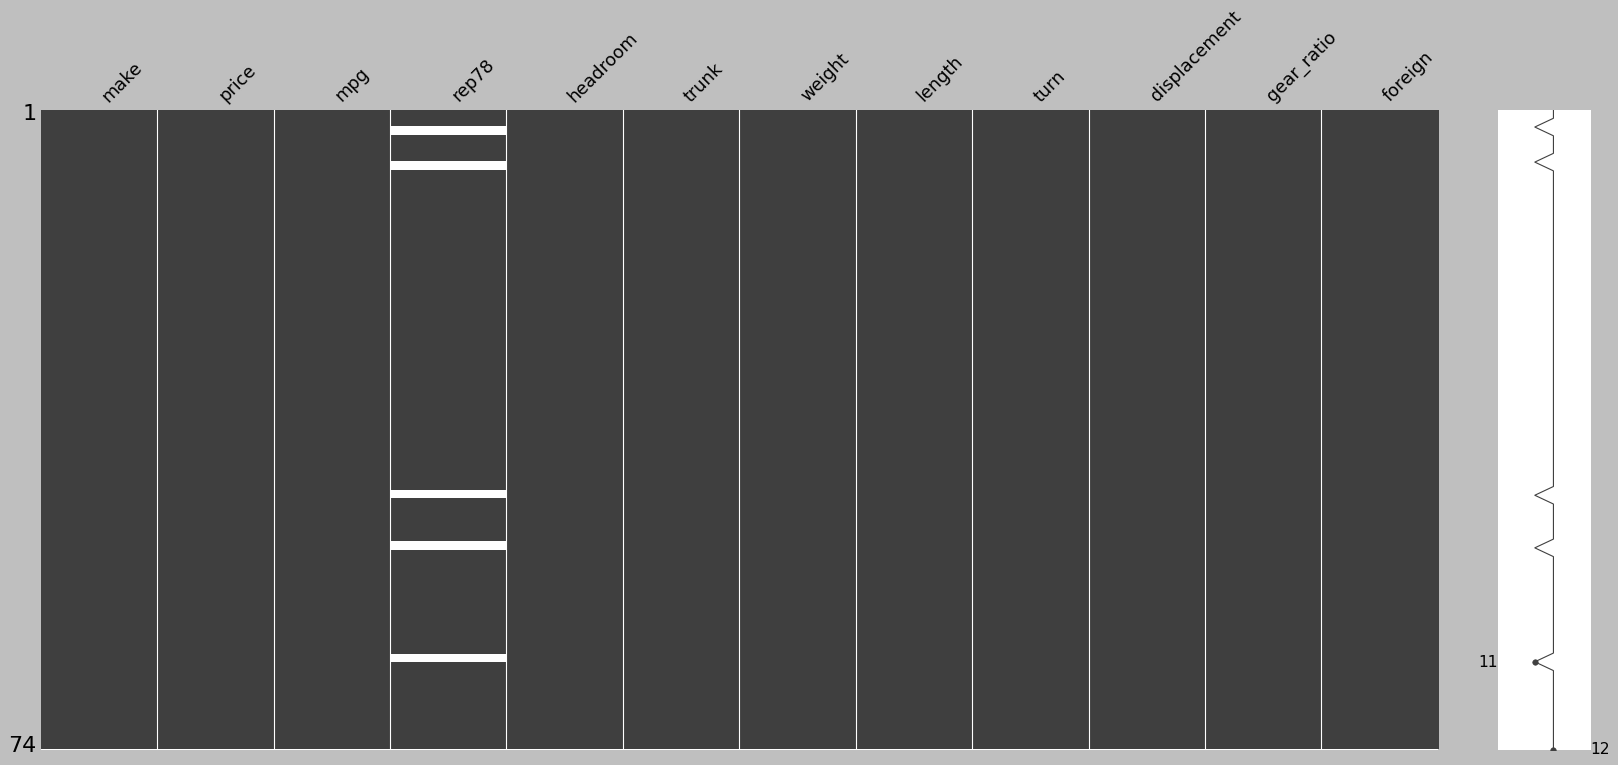

In [ ]:
msno.matrix(auto)

In [ ]:
auto['rep78'][0:3]
print()
auto['rep78'][0:3].notnull()
print()
auto['rep78'][0:3].isnull()

0    3.0
1    3.0
2    NaN
Name: rep78, dtype: float64

0     True
1     True
2    False
Name: rep78, dtype: bool

0    False
1    False
2     True
Name: rep78, dtype: bool

In [ ]:
# missing data
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

auto['rep78'].value_counts(dropna=False) #doesn't show missing unless explicitly told
#print(auto['rep78'].to_string()) #print all rows
print()
print("count of missing:")
auto['rep78'].isnull().sum() #count missings on rep78 #NaN stands for missing
print()
#auto.loc[auto['rep78'].isnull()]
#auto[auto.rep78.isnull()][['rep78']]
auto[auto.rep78.isnull()][['make', 'price', 'mpg', 'rep78', 'foreign']] #stata: l make price mpg rep78 foreign if rep78==.

3.0    30
4.0    18
5.0    11
2.0     8
NaN     5
1.0     2
Name: rep78, dtype: int64


count of missing:


5

make  price  mpg  rep78   foreign
2      AMC Spirit   3799   22    NaN  Domestic
6      Buick Opel   4453   26    NaN  Domestic
44  Plym. Sapporo   6486   26    NaN  Domestic
50  Pont. Phoenix   4424   19    NaN  Domestic
63    Peugeot 604  12990   14    NaN   Foreign

In [ ]:
auto2=auto.replace(np.nan, "None") #replace missing (np.nan) with "None"
auto2[auto2["rep78"]=="None"] #list the missing ones
#!!!BUT in Py best keep missing as np.nan, so in general do sth like:
#auto.replace(-99, np.nan,inplace=True) #replace all -99 with missing
#auto.fillna(np.nan, inplace=True) #replace missing with np.nan

#can also get rid of missing just keep finite stuff (in practice typically dont do it):
#auto3 = auto[np.isfinite(auto['rep78'])]
#auto3.reset_index(inplace=True) #sometimes things go wrong bc index is not reset!
#len(auto)
#print()
#len(auto3)
##or more concisely for all of dataframe:
#len(auto)
#len(auto.dropna())
#auto.dropna(axis=1).dtypes #drop cols with missing data

make  price  mpg rep78  headroom  trunk  weight  length  turn  \
2      AMC Spirit   3799   22  None       3.0     12    2640     168    35   
6      Buick Opel   4453   26  None       3.0     10    2230     170    34   
44  Plym. Sapporo   6486   26  None       1.5      8    2520     182    38   
50  Pont. Phoenix   4424   19  None       3.5     13    3420     203    43   
63    Peugeot 604  12990   14  None       3.5     14    3420     192    38   

    displacement  gear_ratio   foreign  
2            121        3.08  Domestic  
6            304        2.87  Domestic  
44           119        3.54  Domestic  
50           231        3.08  Domestic  
63           163        3.58   Foreign

#### manipulating

In [ ]:
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
auto=pd.read_stata('auto.dta')

In [ ]:
# tostring, destring
auto['mpgST'] = auto.mpg.astype(object) #tostring
auto['mpgNU'] = auto.mpgST.astype(float) #destring
auto[['mpg','mpgST','mpgNU']][0:2]
auto[['mpg','mpgST','mpgNU']].dtypes #.fillna()

mpg mpgST  mpgNU
0   22    22   22.0
1   17    17   17.0

mpg        int16
mpgST     object
mpgNU    float64
dtype: object

In [ ]:
#encode--see sec scikit-learn preprocessing
#auto.foreign.value_counts()

In [ ]:
auto = auto.rename(columns={'mpg': 'newMpg',
                           'make': 'newMake'})
auto.dtypes

newMake           object
price              int16
newMpg             int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
#in general better just subset/slice at the beginning: easier to keep than drop if many vars
#del auto['newMpg']
auto.drop('newMpg',axis=1) #can specify list of vars in [[]]

newMake  price  rep78  headroom  trunk  weight  length  turn  \
0     AMC Concord   4099    3.0       2.5     11    2930     186    40   
1       AMC Pacer   4749    3.0       3.0     11    3350     173    40   
2      AMC Spirit   3799    NaN       3.0     12    2640     168    35   
3   Buick Century   4816    3.0       4.5     16    3250     196    40   
4   Buick Electra   7827    4.0       4.0     20    4080     222    43   
..            ...    ...    ...       ...    ...     ...     ...   ...   
69      VW Dasher   7140    4.0       2.5     12    2160     172    36   
70      VW Diesel   5397    5.0       3.0     15    2040     155    35   
71      VW Rabbit   4697    4.0       3.0     15    1930     155    35   
72    VW Scirocco   6850    4.0       2.0     16    1990     156    36   
73      Volvo 260  11995    5.0       2.5     14    3170     193    37   

    displacement  gear_ratio   foreign  
0            121        3.58  Domestic  
1            258        2.53  Domestic  
2            121        3.08  Domestic  
3            196        2.93  Domestic  
4            350        2.41  Domestic  
..           ...         ...       ...  
69            97        3.74   Foreign  
70            90        3.78   Foreign  
71            89        3.78   Foreign  
72            97        3.78   Foreign  
73           163        2.98   Foreign  

[74 rows x 11 columns]

In [ ]:
#https://www.statology.org/pandas-drop-rows-with-value/
auto=auto[auto.price!=4099]

In [ ]:
#new vars
auto['colOfOnes'] = 1
auto['colOfOnes'][0:3]
#auto.at[0,'colOfOnes']

auto.insert(loc=0,column='weiLenRat',value=(auto.weight/auto.length))  #loc is where
auto.iloc[0:5,0:10]

0    1
1    1
2    1
Name: colOfOnes, dtype: int64

weiLenRat           make  price  mpg  rep78  headroom  trunk  weight  \
0  15.752688    AMC Concord   4099   22    3.0       2.5     11    2930   
1  19.364162      AMC Pacer   4749   17    3.0       3.0     11    3350   
2  15.714286     AMC Spirit   3799   22    NaN       3.0     12    2640   
3  16.581633  Buick Century   4816   20    3.0       4.5     16    3250   
4  18.378378  Buick Electra   7827   15    4.0       4.0     20    4080   

   length  turn  
0     186    40  
1     173    40  
2     168    35  
3     196    40  
4     222    43

In [ ]:
auto.at[1,'colOfOnes'] = 10 #https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe
auto['colOfOnes'][0:5]
#rt so even if need to edit file by hand ie change vals in cells do it with code like here; not with excel!!
#also note this is mistake prone, double check; and again better if index is sth meaningful, then:
#auto.at['Honda Civic','colOfOnes'] = 10

0     1
1    10
2     1
3     1
4     1
Name: colOfOnes, dtype: int64

In [ ]:
auto['colOfOnes'].replace(1,2,inplace=True)
# can also replace more than one at once, eg
# data['sex'].replace([0,1],['Female','Male'],inplace=True)
# see https://stackoverflow.com/questions/31888871/pandas-replacing-column-values

auto['colOfOnes'][0:5]

0     2
1    10
2     2
3     2
4     2
Name: colOfOnes, dtype: int64

In [ ]:
# replace on condition
#auto.loc[auto['colOfOnes'] <5, 'colOfOnes']  = '22'
auto.loc[auto['foreign'] =='Domestic', 'colOfOnes']  = '100'
#auto.loc[auto.mpg > 20, 'mpg'] = 200
auto[['foreign','colOfOnes']][48:53]

foreign colOfOnes
48  Domestic       100
49  Domestic       100
50  Domestic       100
51  Domestic       100
52   Foreign       NaN

In [ ]:
auto.at[50,'colOfOnes'] = -10 #rt so another reason to have index as sth meaningful!!!
auto[['foreign','colOfOnes']][48:53]

foreign colOfOnes
48  Domestic       100
49  Domestic       100
50  Domestic       -10
51  Domestic       100
52   Foreign       NaN

In [ ]:
auto.head(3)

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0  AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1    AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   
2   AMC Spirit   3799   22    NaN       3.0     12    2640     168    35   

   displacement  gear_ratio   foreign  
0           121        3.58  Domestic  
1           258        2.53  Domestic  
2           121        3.08  Domestic

In [ ]:
###map/recode

data = pd.DataFrame({"food": ["bacon", "pulled pork", "bacon",
                             "pastrami", "corned beef", "bacon",
                             "pastrami", "honey ham", "nova lox"],
                             "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     pastrami     6.0
4  corned beef     7.5
5        bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0

In [ ]:
meat_to_animal = {
  "bacon": "pig",
  "pulled pork": "pig",
  "pastrami": "cow",
  "corned beef": "cow",
  "honey ham": "pig",
  "nova lox": "salmon"
}
data["animal"] = data["food"].map(meat_to_animal)
data

food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     pastrami     6.0     cow
4  corned beef     7.5     cow
5        bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon

In [ ]:
#back to auto data
mapping  ={1:1
          ,2:1
          ,3:2
          ,4:2
          ,5:3}
a=auto.assign(rep78N=auto.rep78.map(mapping))
a[['rep78','rep78N']]

rep78  rep78N
0     3.0     2.0
1     3.0     2.0
2     NaN     NaN
3     3.0     2.0
4     4.0     2.0
..    ...     ...
69    4.0     2.0
70    5.0     3.0
71    4.0     2.0
72    4.0     2.0
73    5.0     3.0

[74 rows x 2 columns]

In [ ]:
##another example
# say have var X049 with 8cat and want to recode it into 6cat
#mapping = {1:'<10k'
#          ,2:'<10k'
#          ,3:'<10k'
#          ,4:'10-20k'
#          ,5:'20-50k'
#          ,6:'50-100k'
#          ,7:'.1-.5m'
#          ,8:'>.5m'
#                    }
#df=df.assign(rurUrb  = df.X049.map(mapping))

In [ ]:
###cut into bins / map ranges
auto.weight.describe().round(0)

count      74.0
mean     3019.0
std       777.0
min      1760.0
25%      2250.0
50%      3190.0
75%      3600.0
max      4840.0
Name: weight, dtype: float64

In [ ]:
bins = [min(auto['weight']), 3000, max(auto['weight'])]
cats = ['light', 'heavy']
auto['weiCat'] = pd.cut(auto['weight'], bins=bins, labels=cats)
auto[['weiCat','weight']]

weiCat  weight
0   light    2930
1   heavy    3350
2   light    2640
3   heavy    3250
4   heavy    4080
..    ...     ...
69  light    2160
70  light    2040
71  light    1930
72  light    1990
73  heavy    3170

[74 rows x 2 columns]

In [ ]:
#can dummy it out easily
#auto.rep78.value_counts()
d=pd.get_dummies(auto['rep78'], prefix='rep78', drop_first=False) #.astype('int')
auto = pd.concat([auto, d], axis=1)
auto.filter(regex=("rep78.*"))  #auto[[col for col in auto if col.startswith('rep78')]]

rep78  rep78_1.0  rep78_2.0  rep78_3.0  rep78_4.0  rep78_5.0  rep78_1.0  \
0     3.0          0          0          1          0          0          0   
1     3.0          0          0          1          0          0          0   
2     NaN          0          0          0          0          0          0   
3     3.0          0          0          1          0          0          0   
4     4.0          0          0          0          1          0          0   
..    ...        ...        ...        ...        ...        ...        ...   
69    4.0          0          0          0          1          0          0   
70    5.0          0          0          0          0          1          0   
71    4.0          0          0          0          1          0          0   
72    4.0          0          0          0          1          0          0   
73    5.0          0          0          0          0          1          0   

    rep78_2.0  rep78_3.0  rep78_4.0  rep78_5.0  
0           0          1          0          0  
1           0          1          0          0  
2           0          0          0          0  
3           0          1          0          0  
4           0          0          1          0  
..        ...        ...        ...        ...  
69          0          0          1          0  
70          0          0          0          1  
71          0          0          1          0  
72          0          0          1          0  
73          0          0          0          1  

[74 rows x 11 columns]

In [ ]:
# https://stackoverflow.com/questions/50068443/collapse-rows-in-pandas-dataframe-with-different-logic-per-column
auto[['foreign','weight', 'length']].groupby('foreign').agg(['mean', 'count']) #stata: by sort: egen OR collapse

weight            length      
                 mean count        mean count
foreign                                      
Domestic  3317.115385    52  196.134615    52
Foreign   2315.909091    22  168.545455    22

In [ ]:
#lets unpack a bit as this groupby agg may be non-intuitive
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                    'C': np.random.randn(4)})
df
#and for a real world example using groupby agg see
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

A  B         C
0  1  1  1.058948
1  1  2 -1.301589
2  2  3 -0.752999
3  2  4  0.993326

In [ ]:
df.groupby('A').agg('min')

B         C
A             
1  1 -1.301589
2  3 -0.752999

In [ ]:
df.groupby('A').agg(['min', 'max'])

B             C          
  min max       min       max
A                            
1   1   2 -1.301589  1.058948
2   3   4 -0.752999  0.993326

In [ ]:
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

B             C
  min max       sum
A                  
1   1   2 -0.242641
2   3   4  0.240328

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   newMake       74 non-null     object  
 1   price         74 non-null     int16   
 2   newMpg        74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 3.5+ KB


In [ ]:
#vafter groupby can get the groups
g=auto[['mpg','foreign']].groupby('foreign')
g.get_group('Domestic').head(3)
g.get_group('Foreign').head(3)

mpg   foreign
0   22  Domestic
1   17  Domestic
2   22  Domestic

mpg  foreign
52   17  Foreign
53   23  Foreign
54   25  Foreign

#### labelling

i'd just have nice descriptive (yet short) var names, ditch var labels; and for val labels just have another string var that has labels instead of values, eg foreignS: domestic/foreign; foreignN: 0/1



<br>BUT see a workaround with dict below for printing var labels from stata
other ideas
https://stackoverflow.com/questions/60498830/view-stata-variable-labels-in-pandas ;
https://stackoverflow.com/questions/22500108/value-label-in-pandas ;
https://stackoverflow.com/questions/60805100/any-way-to-label-variables-in-python


<br>[LATER/TODO--see pandas docs
Value Labels: Python doesn't have value labels, but it has something even more useful, dicts.  
(I suspect that, under the covers, Stata is using hashes, which is what dicts really are, for value labels). The idea is to use a dict to map some or all of the values for a variable.]



In [ ]:
# var labels #on stata iterator in py: https://kylebarron.dev/blog/reading-stata-files-with-python
pd.read_stata('auto.dta', iterator=True).variable_labels() #return stata reader obj
#itr.variable_labels()

# can also return data label and val labels
# pandas.io.stata.StataReader.data_label
# pandas.io.stata.StataReader.value_labels

{'make': 'Make and Model',
 'price': 'Price',
 'mpg': 'Mileage (mpg)',
 'rep78': 'Repair Record 1978',
 'headroom': 'Headroom (in.)',
 'trunk': 'Trunk space (cu. ft.)',
 'weight': 'Weight (lbs.)',
 'length': 'Length (in.)',
 'turn': 'Turn Circle (ft.) ',
 'displacement': 'Displacement (cu. in.)',
 'gear_ratio': 'Gear Ratio',
 'foreign': 'Car type'}

### [sep26] merge


often all that matters is awesome idea, and good data, and you hit pnas or nature superbowl, eg:

https://www.pnas.org/doi/10.1073/pnas.1518393112

https://www.nature.com/articles/467912a


remember, difficult and tedious but extremely useful

merge on geo (county, muni, school id, etc), time (year, day, hour, etc), or on both (panel)

and anything else that you can find in 2 different datasets, eg occ code

REFS:

https://stackoverflow.com/questions/53645882/pandas-merging-101 nice schematic!

http://pandas.pydata.org/pandas-docs/stable/merging.html

https://realpython.com/pandas-merge-join-and-concat/

https://sparkbyexamples.com/pandas/pandas-merge-dataframes-explained-examples/

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

https://wesmckinney.com/book/data-wrangling



In [ ]:
#make some dataset
d1 = pd.DataFrame({'id': ['1',  '2',  '3',  '4'],
                   'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3']
                   })

d2 = pd.DataFrame({'id': ['1', '2', '5', '6'],
                   'A': ['A4', 'A5', 'A6', 'A7'],
                   'C': ['C4', 'C5', 'C6', 'C7']
                   })
d1
d2

id   A   B
0  1  A0  B0
1  2  A1  B1
2  3  A2  B2
3  4  A3  B3

id   A   C
0  1  A4  C4
1  2  A5  C5
2  5  A6  C6
3  6  A7  C7

In [ ]:
mergedOuter = pd.merge(d1, d2, how='outer', on=['id'],indicator=True) #outer=keep all
mergedOuter #if multiple left and right nonmerges often useful to sort on id to figure out of similar didnt match

#note esp when doing multiple merges, name the _merge indicator variable sth else; so instead of
#indicator=True
#do eg:
#indicator='d1-d2'

id  A_x    B  A_y    C      _merge
0  1   A0   B0   A4   C4        both
1  2   A1   B1   A5   C5        both
2  3   A2   B2  NaN  NaN   left_only
3  4   A3   B3  NaN  NaN   left_only
4  5  NaN  NaN   A6   C6  right_only
5  6  NaN  NaN   A7   C7  right_only

In [ ]:
# again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT
#do value counts on _merge and list the merge var (key,id) for these that failed merge
#be esp careful if both left and right didnt merge fully

mergedOuter['_merge'].value_counts() #.plot(kind='barh')
mergedOuter['id'][mergedOuter['_merge']=='left_only']
mergedOuter['id'][mergedOuter['_merge']=='right_only']
#pd.crosstab(mergedOuter["_merge"], mergedOuter["id"])

#clumsy way to check things around:
#mergedOuter.isnull().any() #double-check if any mismatches-may first look for rows with nulls
#mergedOuter[mergedOuter['A_x'].isnull()] #zoom in on A_x: aha so these with id 5 and 6 are missing on A_x
#mergedOuter.loc[mergedOuter['A_x'].isnull(), 'id'].unique() #convinently list ids that are missing on A_x
# 5 and 6, and we know that A_x comes from d1 and d1 ids are 1-4, so 5-6 must be missing, so we're good

left_only     2
right_only    2
both          2
Name: _merge, dtype: int64

2    3
3    4
Name: id, dtype: object

4    5
5    6
Name: id, dtype: object

In [ ]:
#another way
set(d1['id']).difference(set(d2['id'])) #.intersection(set(d1['id'])))
set(d2['id']).difference(set(d1['id']))

{'3', '4'}

{'5', '6'}

In [ ]:
#!!!important sometimes need to replace on condition in one file to match eg
# USA!=the US
#auto.loc[df['ctry'] =='the US', 'ctry']  = 'USA'

In [ ]:
mergedInner = pd.merge(d1, d2, how='inner', on=['id']) #inner=keep match
mergedInner

id A_x   B A_y   C
0  1  A0  B0  A4  C4
1  2  A1  B1  A5  C5

In [ ]:
mergedLeft = pd.merge(d1, d2, how='left', on=['id']) #left=keep all from 1st
mergedLeft

id A_x   B  A_y    C
0  1  A0  B0   A4   C4
1  2  A1  B1   A5   C5
2  3  A2  B2  NaN  NaN
3  4  A3  B3  NaN  NaN

In [ ]:
mergedRight = pd.merge(d1, d2, how='right', on=['id']) #right=keep all from 2nd
mergedRight

id  A_x    B A_y   C
0  1   A0   B0  A4  C4
1  2   A1   B1  A5  C5
2  5  NaN  NaN  A6  C6
3  6  NaN  NaN  A7  C7

In [ ]:
#real world example

#get 1st dataset: counties and population
njCounties=pd.read_csv("https://raw.githubusercontent.com/theaok/data/main/njCounties.csv")

#njCounties.head()
#njCounties.dtypes
#njCounties.describe().round(2)
njCounties[['COUNTY','POPDEN2010']]

#njCounties['POPDEN2010'].replace(450,450.9,inplace=True) #just an example
#njCounties['POPDEN2010'].hist(bins=5)
#njCounties.boxplot(column='POPDEN2010',by='REGION'), plt.show()

COUNTY  POPDEN2010
0     ATLANTIC         450
1       BERGEN        3774
2   BURLINGTON         547
3       CAMDEN        2257
4     CAPE MAY         340
5   CUMBERLAND         313
6        ESSEX        6044
7   GLOUCESTER         857
8       HUDSON       12309
9    HUNTERDON         293
10      MERCER        1602
11    MONMOUTH        1298
12       OCEAN         761
13     PASSAIC        2527
14       SALEM         190
15    SOMERSET        1061
16      SUSSEX         279
17       UNION        5091
18      WARREN         300
19      MORRIS        1023
20   MIDDLESEX        2555

In [ ]:
#manipulating strings: often necessary!

#njCounties['COUNTY_LAB'].str[:-7]
#njCounties['COUNTY_LAB'].str.len() #https://www.geeksforgeeks.org/python-pandas-series-str-len/

#https://towardsdatascience.com/pandas-remove-unwanted-parts-from-strings-92ac881e60a2
njCounties['COUNTY_LAB'].str.replace(' County','') #note blank before the county

0       Atlantic
1         Bergen
2     Burlington
3         Camden
4       Cape May
5     Cumberland
6          Essex
7     Gloucester
8         Hudson
9      Hunterdon
10        Mercer
11      Monmouth
12         Ocean
13       Passaic
14         Salem
15      Somerset
16        Sussex
17         Union
18        Warren
19        Morris
20     Middlesex
Name: COUNTY_LAB, dtype: object

In [ ]:
#2nd dataset: counties and housing prices
!wget -q -O zillow.csv https://raw.githubusercontent.com/theaok/data/main/all_homes.csv
zillow=pd.read_csv('zillow.csv')
zillow.head(3)
zil1=zillow[['UPPER','Dec 2012']]
zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset


UPPER  Data Type  Aug 2012  Sep 2012  Oct 2012  Nov 2012  Dec 2012
0  NEW JERSEY  All Homes    256100  $256,900  $258,300  $259,100  259700.0
1    ATLANTIC  All Homes    179900  $179,700  $181,200  $183,100  185800.0
2      BERGEN  All Homes    375200  $376,600  $377,000  $377,600  380000.0

<ipython-input-13-d80dbc9bea8c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset


In [ ]:
#note that sometimes strangely enough strings that apparently do match dont merge, white space to blame!
njCounties['COUNTY']=njCounties['COUNTY'].str.strip()
zil1['COUNTY']=zil1['COUNTY'].str.strip()

<ipython-input-14-4b7f2869c32f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zil1['COUNTY']=zil1['COUNTY'].str.strip()


In [ ]:
#merge
njC1 = pd.merge(njCounties,zil1, on='COUNTY',how='outer',indicator=True)
#njC1.dtypes
njC1[['COUNTY','Dec 2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge

COUNTY  Dec 2012  POPDEN2010      _merge
0     ATLANTIC  185800.0       450.0        both
1       BERGEN  380000.0      3774.0        both
2   BURLINGTON  197800.0       547.0        both
3       CAMDEN  149400.0      2257.0        both
4     CAPE MAY  313600.0       340.0        both
5   CUMBERLAND  120100.0       313.0        both
6        ESSEX  282800.0      6044.0        both
7   GLOUCESTER  175900.0       857.0        both
8       HUDSON  293100.0     12309.0        both
9    HUNTERDON  327000.0       293.0        both
10      MERCER  201900.0      1602.0        both
11    MONMOUTH  331100.0      1298.0        both
12       OCEAN  234100.0       761.0        both
13     PASSAIC  257700.0      2527.0        both
14       SALEM  143600.0       190.0        both
15    SOMERSET  331400.0      1061.0        both
16      SUSSEX  208700.0       279.0        both
17       UNION  258400.0      5091.0        both
18      WARREN  193600.0       300.0        both
19      MORRIS       NaN      1023.0        both
20   MIDDLESEX  261100.0      2555.0        both
21  NEW JERSEY  259700.0         NaN  right_only

In [ ]:
#fig, ax = plt.subplots(figsize=(15,10))
#ax.scatter(njC1['POPDEN2010'],njC1['Dec 2012'] )
#plt.xlabel('den', fontsize=18)
#plt.ylabel('hou pri', fontsize=16)
#for i, txt in enumerate(njC1['COUNTY']):
#    ax.annotate(txt, (njC1['POPDEN2010'][i],njC1['Dec 2012'][i]),fontsize=8)

#### [oct3] many to one; and more examples

REF:

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

note its a whole free data science free online book with free notebooks :) may skim through other chapters etc

may also see:
https://stackoverflow.com/questions/44842458/merging-pandas-columns-one-to-many

In [ ]:
# many to one

#first get some data, and start with one to one merge
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

df3 = pd.merge(df1, df2,how='outer',indicator=True,on='employee')

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3,df4) #so group is many in df3 to one in df4

employee        group  hire_date _merge
0      Bob   Accounting       2008   both
1     Jake  Engineering       2012   both
2     Lisa  Engineering       2004   both
3      Sue           HR       2014   both

group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

In [ ]:
del df3['_merge']
pd.merge(df3, df4,how='outer',indicator=True, on='group') #note same syntax as for one to one

employee        group  hire_date supervisor _merge
0      Bob   Accounting       2008      Carly   both
1     Jake  Engineering       2012      Guido   both
2     Lisa  Engineering       2004      Guido   both
3      Sue           HR       2014      Steve   both

In [ ]:
#another real world example

#first get data, note alternative to urllib retreive:
!curl  -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl  -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl  -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   232k      0 --:--:-- --:--:-- --:--:--  233k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   2621      0 --:--:-- --:--:-- --:--:--  2625
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   4134      0 --:--:-- --:--:-- --:--:--  4152


In [ ]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

pop.head(8)
areas.head()
abbrevs.head()

state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
5           AL    total  2011   4801627.0
6           AL    total  2009   4757938.0
7           AL  under18  2009   1134192.0

state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [ ]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation',indicator=True)
merged.head(3)

state/region     ages  year  population    state abbreviation _merge
0           AL  under18  2012   1117489.0  Alabama           AL   both
1           AL    total  2012   4817528.0  Alabama           AL   both
2           AL  under18  2010   1130966.0  Alabama           AL   both

In [ ]:
# again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT
merged['_merge'].value_counts() #.plot(kind='barh') #left a problem, many 96

both          2448
left_only       96
right_only       0
Name: _merge, dtype: int64

In [ ]:
#!! and then step by step do all investigations as follows

In [ ]:
merged['state/region'][merged['_merge']=='left_only'] #again many

2448     PR
2449     PR
2450     PR
2451     PR
2452     PR
       ... 
2539    USA
2540    USA
2541    USA
2542    USA
2543    USA
Name: state/region, Length: 96, dtype: object

In [ ]:
merged['state/region'][merged['_merge']=='left_only'].value_counts() #aha 48 PR and USA

PR     48
USA    48
Name: state/region, dtype: int64

In [ ]:
merged['year'][merged['_merge']=='left_only'].value_counts() #hmm like 4 per yr

1990    4
1991    4
2011    4
2010    4
2009    4
2013    4
2008    4
2007    4
2006    4
2005    4
2003    4
2004    4
2002    4
2001    4
2000    4
1999    4
1997    4
1998    4
1996    4
1995    4
1994    4
1992    4
1993    4
2012    4
Name: year, dtype: int64

In [ ]:
merged.query("year == 1991 & _merge == 'left_only'") #lets zoom in

state/region     ages  year   population state abbreviation     _merge
2450           PR    total  1991          NaN   NaN          NaN  left_only
2451           PR  under18  1991          NaN   NaN          NaN  left_only
2498          USA    total  1991  252980942.0   NaN          NaN  left_only
2499          USA  under18  1991   65313018.0   NaN          NaN  left_only

In [ ]:
#ok so we got PR and US and bunch of years for ages total and under18
#make sure stuff like that wasnt in the right dataset:
merged['abbreviation'][merged['_merge']=='both'].unique() #yea no PR or USA there

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [ ]:
merged['state'][merged['_merge']=='right_only']

Series([], Name: state, dtype: object)

In [ ]:
#### this is helpful! always do it!!! unless super many ids
pd.crosstab(merged["state/region"],merged["_merge"])

_merge        left_only  both
state/region                 
AK                    0    48
AL                    0    48
AR                    0    48
AZ                    0    48
CA                    0    48
CO                    0    48
CT                    0    48
DC                    0    48
DE                    0    48
FL                    0    48
GA                    0    48
HI                    0    48
IA                    0    48
ID                    0    48
IL                    0    48
IN                    0    48
KS                    0    48
KY                    0    48
LA                    0    48
MA                    0    48
MD                    0    48
ME                    0    48
MI                    0    48
MN                    0    48
MO                    0    48
MS                    0    48
MT                    0    48
NC                    0    48
ND                    0    48
NE                    0    48
NH                    0    48
NJ                    0    48
NM                    0    48
NV                    0    48
NY                    0    48
OH                    0    48
OK                    0    48
OR                    0    48
PA                    0    48
PR                   48     0
RI                    0    48
SC                    0    48
SD                    0    48
TN                    0    48
TX                    0    48
USA                  48     0
UT                    0    48
VA                    0    48
VT                    0    48
WA                    0    48
WI                    0    48
WV                    0    48
WY                    0    48

In [ ]:
#clumsy way:
# again and again super important to investigate what happened!!
#merged.isnull().any() #double-check if any mismatches-look for rows with nulls
#merged[merged['population'].isnull()] #aha! all PR <2000 and state entries also null, so there was no corresponding entry in the abbrevs key! let's see which regions dont match
# merged.loc[merged['state'].isnull(), 'state/region'].unique() #ta da! PR and USA are not in abbrevs key

In [ ]:
#merged.query("year == 2010 & ages == 'total'") # a neat way to subset!!

In [ ]:
# merge on more than one var eg panel data: time-geo eg year-state uniquely ids a var

d1 = pd.DataFrame({'id': ['1',  '1',  '2',  '2'],
                   't': ['1', '2', '1', '2'],
                   'B': ['B0', 'B1', 'B2', 'B3']
                   })

d2 = pd.DataFrame({'id': ['1', '2', '2', '2'],
                   't': ['1', '2', '3', '4'],
                   'C': ['C4', 'C5', 'C6', 'C7']
                   })
d1
d2

id  t   B
0  1  1  B0
1  1  2  B1
2  2  1  B2
3  2  2  B3

id  t   C
0  1  1  C4
1  2  2  C5
2  2  3  C6
3  2  4  C7

In [ ]:
#check for duplicates
d[['id ','t']][d[['id ','t']].duplicated()]

In [ ]:
pd.merge(d1, d2, how='outer', on=['id','t'],indicator=True) #outer=keep all

id  t    B    C      _merge
0  1  1   B0   C4        both
1  1  2   B1  NaN   left_only
2  2  1   B2  NaN   left_only
3  2  2   B3   C5        both
4  2  3  NaN   C6  right_only
5  2  4  NaN   C7  right_only

merge tips:

simplify! eg subset to fewer obs and vars (as laways)

simplify! eg subset to fewer categories/hierarchies: eg only one cat per id, say instead of tot, mal, fem for each id (eg school) just subset to tot

beware of missing obs on key/id/merge var

double and triple check


## [*] [oct17] extra topics

what we covered is useful most of the time, there is much more, however

some useful stuff listed below just briefly because most or many of you may not end up using those and i dont want to burden you with unnecessary stuff

but do let me know if any questions/need to cover any of these or any other topics

#### profiling

(run on not too many variables, otherwhise file huge like 50mb; and in any event dont want to run it on variables that are not useful)

a ton of decriptive stats at once

https://medium.com/@seckindinc/data-profiling-with-python-36497d3a1261

In [ ]:
# BUG!!! have to run this first! BEFORE running setup in 1st cell (importing time, zipfile, pandas etc)
#apparently it conflicts with one of those, if you already run other stuff before this: Runtime-Restart runtime (at top menu)
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [ ]:
import pandas as pd
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
# index is the key or id var.get_group
auto=pd.read_stata('auto.dta') #,index_col='make' load stata data

In [ ]:
ProfileReport(auto, title="blah")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### str and regexp
(fun fun fun)

if you deal with text data check this out

https://developers.google.com/edu/python and for regexp: https://developers.google.com/edu/python/regular-expressions

https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html

https://wesmckinney.com/book/data-cleaning#text_string_manip

https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter9-wrangling-advanced.html#working-with-strings

(Py better, but Stata can do text too: https://theaok.github.io/dm/stata_text.do)

below some quick useful string functions

In [ ]:
"make it upper case".upper()
"make it lower case".lower()
"capitalize first letter of each word".title()
"Swap Case".swapcase()

'MAKE IT UPPER CASE'

'make it lower case'

'Capitalize First Letter Of Each Word'

'sWAP cASE'

In [ ]:
"replace blah with blaaah".replace("blah", "blaaah")

'replace blaaah with blaaah'

In [ ]:
a=" white space at the beginning and end is tricky! "
len(a)
print()
len(a.strip()) #use strip to remove it at the beinning and end (not in the middle)

49

47

In [ ]:
njCounties=pd.read_csv("https://raw.githubusercontent.com/theaok/data/main/njCounties.csv")
njCounties['COUNTY_LAB'][0:3]

0      Atlantic County
1        Bergen County
2    Burlington County
Name: COUNTY_LAB, dtype: object

In [ ]:
#njCounties['COUNTY_LAB'][0:3].str.len()
njCounties['COUNTY_LAB'][0:3].str[:-7]

0      Atlantic
1        Bergen
2    Burlington
Name: COUNTY_LAB, dtype: object

In [ ]:
njCounties['COUNTY_LAB'][0:3].str.replace(' County','') #note blank before county https://towardsdatascience.com/pandas-remove-unwanted-parts-from-strings-92ac881e60a2

0      Atlantic
1        Bergen
2    Burlington
Name: COUNTY_LAB, dtype: object

In [ ]:
#sometimes strings looks exact same and dont match--whitespece to blame!
njCounties['COUNTY_LAB'][0:3].str.strip() #rm whitespace at left and right (not in the middle) ; also: rstrip() & lstrip()
# can strip other stuff eg "*" BUT only works at the end or the begiing of the string not in the middle;
#eg here:  A B y work and so do: ty County, etc

0      Atlantic County
1        Bergen County
2    Burlington County
Name: COUNTY_LAB, dtype: object

In [ ]:
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download') #,index_col='make' load stata data
auto.head(2)

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0  AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1    AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   

   displacement  gear_ratio   foreign  
0           121        3.58  Domestic  
1           258        2.53  Domestic

In [ ]:
str(auto['make'].to_list())
print('\n\nand now count of AMC:')
str(auto['make'].to_list()).count('AMC')

"['AMC Concord', 'AMC Pacer', 'AMC Spirit', 'Buick Century', 'Buick Electra', 'Buick LeSabre', 'Buick Opel', 'Buick Regal', 'Buick Riviera', 'Buick Skylark', 'Cad. Deville', 'Cad. Eldorado', 'Cad. Seville', 'Chev. Chevette', 'Chev. Impala', 'Chev. Malibu', 'Chev. Monte Carlo', 'Chev. Monza', 'Chev. Nova', 'Dodge Colt', 'Dodge Diplomat', 'Dodge Magnum', 'Dodge St. Regis', 'Ford Fiesta', 'Ford Mustang', 'Linc. Continental', 'Linc. Mark V', 'Linc. Versailles', 'Merc. Bobcat', 'Merc. Cougar', 'Merc. Marquis', 'Merc. Monarch', 'Merc. XR-7', 'Merc. Zephyr', 'Olds 98', 'Olds Cutl Supr', 'Olds Cutlass', 'Olds Delta 88', 'Olds Omega', 'Olds Starfire', 'Olds Toronado', 'Plym. Arrow', 'Plym. Champ', 'Plym. Horizon', 'Plym. Sapporo', 'Plym. Volare', 'Pont. Catalina', 'Pont. Firebird', 'Pont. Grand Prix', 'Pont. Le Mans', 'Pont. Phoenix', 'Pont. Sunbird', 'Audi 5000', 'Audi Fox', 'BMW 320i', 'Datsun 200', 'Datsun 210', 'Datsun 510', 'Datsun 810', 'Fiat Strada', 'Honda Accord', 'Honda Civic', 'Mazda



and now count of AMC:


3

In [ ]:
auto.make.str.contains('AMC|Datsun').sum()

7

In [ ]:
auto[['make','price']].loc[auto["make"].isin(['AMC Concord','AMC Pacer'])]

make  price
0  AMC Concord   4099
1    AMC Pacer   4749

In [ ]:
auto[auto["make"].str.contains("onda")]["make"].value_counts() #will fit Honda and honda #can also do stuff like ('.*nda')

Honda Accord    1
Honda Civic     1
Name: make, dtype: int64

In [ ]:
auto.make[0:3].str.split(" ", expand=True) # could use str split on / for dates like 1/12/2022

0        1
0  AMC  Concord
1  AMC    Pacer
2  AMC   Spirit

In [ ]:
auto.loc[auto['rep78'].isin([1,2]), "make"].str.split(" ", expand=True)

0         1      2
11   Cad.  Eldorado   None
16  Chev.     Monte  Carlo
17  Chev.     Monza   None
20  Dodge  Diplomat   None
21  Dodge    Magnum   None
22  Dodge       St.  Regis
39   Olds  Starfire   None
45  Plym.    Volare   None
47  Pont.  Firebird   None
51  Pont.   Sunbird   None

In [ ]:
auto.loc[auto['rep78'].isin([1,2]), "make"].str.split(" ", expand=True)[0]

11     Cad.
16    Chev.
17    Chev.
20    Dodge
21    Dodge
22    Dodge
39     Olds
45    Plym.
47    Pont.
51    Pont.
Name: 0, dtype: object

### reshape

painful but often necessary

reshape (wide_to_long), pivot, stack, unstack, melt

can be confusing see cheatsheets for schematics:

https://github.com/theaok/data/blob/main/Pandas_Cheat_Sheet.pdf

https://github.com/theaok/data/blob/main/Data_Wrangling_Cheat_Sheet.pdf

#### reshape, pivot

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html
np.random.seed(123)
df = pd.DataFrame({"A1970" : {0 : "a", 1 : "b", 2 : "c"},
                   "A1980" : {0 : "d", 1 : "e", 2 : "f"},
                   "B1970" : {0 : 2.5, 1 : 1.2, 2 : .7},
                   "B1980" : {0 : 3.2, 1 : 1.3, 2 : .1},
                   "X"     : dict(zip(range(3), np.random.randn(3)))
                  })
df["id"] = df.index
df

A1970 A1980  B1970  B1980         X  id
0     a     d    2.5    3.2 -1.085631   0
1     b     e    1.2    1.3  0.997345   1
2     c     f    0.7    0.1  0.282978   2

In [ ]:
#pd.wide_to_long(df, ['x'], i='i', j='j')
pdLong=pd.wide_to_long(df, ["A", "B"], i="id", j="year")
pdLong
#A B are stubs/prefixes
#i is a unique id
#year is a new var to be created

X  A    B
id year                  
0  1970 -1.085631  a  2.5
1  1970  0.997345  b  1.2
2  1970  0.282978  c  0.7
0  1980 -1.085631  d  3.2
1  1980  0.997345  e  1.3
2  1980  0.282978  f  0.1

In [ ]:
pdLong.reset_index(level=[0,1],inplace=True)
pdLong

id  year         X  A    B
0   0  1970 -1.085631  a  2.5
1   1  1970  0.997345  b  1.2
2   2  1970  0.282978  c  0.7
3   0  1980 -1.085631  d  3.2
4   1  1980  0.997345  e  1.3
5   2  1980  0.282978  f  0.1

In [ ]:
#long to wide
pdLong.pivot(index='id', columns='year', values=['X','A','B'])
# id from non-unique to unique
# year to col names
# values will be duplicated/split by year

#more on pivot:
#https://www.datasciencemadesimple.com/reshape-long-wide-pandas-python-pivot-function/
#https://www.statology.org/pandas-long-to-wide/
#https://towardsdatascience.com/reshape-pandas-dataframe-with-pivot-table-in-python-tutorial-and-visualization-2248c2012a31
#https://towardsdatascience.com/pivot-tables-in-pandas-with-hands-on-examples-in-python-9f29a48796f2

X              A         B     
year      1970      1980 1970 1980 1970 1980
id                                          
0    -1.085631 -1.085631    a    d  2.5  3.2
1     0.997345  0.997345    b    e  1.2  1.3
2     0.282978  0.282978    c    f  0.7  0.1

In [ ]:
pdLong.unstack() #long to wide another way

id    0           0
      1           1
      2           2
      3           0
      4           1
      5           2
year  0        1970
      1        1970
      2        1970
      3        1980
      4        1980
      5        1980
X     0   -1.085631
      1    0.997345
      2    0.282978
      3   -1.085631
      4    0.997345
      5    0.282978
A     0           a
      1           b
      2           c
      3           d
      4           e
      5           f
B     0         2.5
      1         1.2
      2         0.7
      3         3.2
      4         1.3
      5         0.1
dtype: object

#### stack, unstack, melt

In [ ]:
#https://www.geeksforgeeks.org/reshape-a-pandas-dataframe-using-stackunstack-and-melt-method/

In [ ]:
nba=pd.read_csv('https://raw.githubusercontent.com/theaok/data/main/nba.csv')[0:5]
nba

Name            Team  Number Position   Age Height  Weight  \
0  Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1    Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2   John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3    R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4  Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0

In [ ]:
nbaStack=nba.stack()
nbaStack

0  Name            Avery Bradley
   Team           Boston Celtics
   Number                    0.0
   Position                   PG
   Age                      25.0
   Height                    6-2
   Weight                  180.0
   College                 Texas
   Salary              7730337.0
1  Name              Jae Crowder
   Team           Boston Celtics
   Number                   99.0
   Position                   SF
   Age                      25.0
   Height                    6-6
   Weight                  235.0
   College             Marquette
   Salary              6796117.0
2  Name             John Holland
   Team           Boston Celtics
   Number                   30.0
   Position                   SG
   Age                      27.0
   Height                    6-5
   Weight                  205.0
   College     Boston University
3  Name              R.J. Hunter
   Team           Boston Celtics
   Number                   28.0
   Position                   SG
   Age    

In [ ]:
nbaUnstack=nbaStack.unstack()
nbaUnstack #the original nba

Name            Team Number Position   Age Height Weight  \
0  Avery Bradley  Boston Celtics    0.0       PG  25.0    6-2  180.0   
1    Jae Crowder  Boston Celtics   99.0       SF  25.0    6-6  235.0   
2   John Holland  Boston Celtics   30.0       SG  27.0    6-5  205.0   
3    R.J. Hunter  Boston Celtics   28.0       SG  22.0    6-5  185.0   
4  Jonas Jerebko  Boston Celtics    8.0       PF  29.0   6-10  231.0   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0

In [ ]:
nbaMelt = nba.melt(id_vars =['Name', 'Team']) #cols/vars go into new variable col
nbaMelt.sort_values('Name')

Name            Team  variable              value
0   Avery Bradley  Boston Celtics    Number                0.0
20  Avery Bradley  Boston Celtics    Weight              180.0
30  Avery Bradley  Boston Celtics    Salary          7730337.0
5   Avery Bradley  Boston Celtics  Position                 PG
10  Avery Bradley  Boston Celtics       Age               25.0
25  Avery Bradley  Boston Celtics   College              Texas
15  Avery Bradley  Boston Celtics    Height                6-2
21    Jae Crowder  Boston Celtics    Weight              235.0
11    Jae Crowder  Boston Celtics       Age               25.0
26    Jae Crowder  Boston Celtics   College          Marquette
6     Jae Crowder  Boston Celtics  Position                 SF
31    Jae Crowder  Boston Celtics    Salary          6796117.0
1     Jae Crowder  Boston Celtics    Number               99.0
16    Jae Crowder  Boston Celtics    Height                6-6
22   John Holland  Boston Celtics    Weight              205.0
32   John Holland  Boston Celtics    Salary                NaN
27   John Holland  Boston Celtics   College  Boston University
17   John Holland  Boston Celtics    Height                6-5
2    John Holland  Boston Celtics    Number               30.0
12   John Holland  Boston Celtics       Age               27.0
7    John Holland  Boston Celtics  Position                 SG
34  Jonas Jerebko  Boston Celtics    Salary          5000000.0
19  Jonas Jerebko  Boston Celtics    Height               6-10
14  Jonas Jerebko  Boston Celtics       Age               29.0
24  Jonas Jerebko  Boston Celtics    Weight              231.0
9   Jonas Jerebko  Boston Celtics  Position                 PF
4   Jonas Jerebko  Boston Celtics    Number                8.0
29  Jonas Jerebko  Boston Celtics   College                NaN
3     R.J. Hunter  Boston Celtics    Number               28.0
18    R.J. Hunter  Boston Celtics    Height                6-5
33    R.J. Hunter  Boston Celtics    Salary          1148640.0
23    R.J. Hunter  Boston Celtics    Weight              185.0
13    R.J. Hunter  Boston Celtics       Age               22.0
28    R.J. Hunter  Boston Celtics   College      Georgia State
8     R.J. Hunter  Boston Celtics  Position                 SG

### index/multindex
https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html

In [ ]:
#again useful to set index to sth meaningful as opposed to 0,1,2
#auto = auto.set_index('make')

In [ ]:
#multindexing for panel data only, eg country-year

In [ ]:
#sometimes even columns get multindexed, ie like 2 headers per var

### dates / time series
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

https://wesmckinney.com/book/time-series

### SQL

[clunky--skip, API (next sec) seems more useful these days, but if you need it see:

https://wesmckinney.com/book/accessing-data#io_databases

https://pandas.pydata.org/docs/user_guide/io.html#sql-queries

In [ ]:
import sqlite3

In [ ]:
query = """
   .....: CREATE TABLE test
   .....: (a VARCHAR(20), b VARCHAR(20),
   .....:  c REAL,        d INTEGER
   .....: );"""
con = sqlite3.connect("mydata.sqlite")
con.execute(query)
con.commit()

In [ ]:
data = [("Atlanta", "Georgia", 1.25, 6),
   .....:         ("Tallahassee", "Florida", 2.6, 3),
   .....:         ("Sacramento", "California", 1.7, 5)]

stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [ ]:
cursor = con.execute("SELECT * FROM test")
rows = cursor.fetchall()
rows

[('Atlanta', 'Georgia', 1.25, 6),
 ('Tallahassee', 'Florida', 2.6, 3),
 ('Sacramento', 'California', 1.7, 5)]

In [ ]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

a           b     c  d
0      Atlanta     Georgia  1.25  6
1  Tallahassee     Florida  2.60  3
2   Sacramento  California  1.70  5

## APIs
(pulling data straight from online); and basic (native pandas) graphs

<br> Pandas comes with handy functionality to pull data straight from eg Fed (for students interested in domestic stuff) and from World Bank (for folks with intl interests).

There's a bunch of others:
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

And there's a ton of API functionality outside of pandas, can just google
your database/website + "python API" eg: "goodreads python api"

And btw as a sidenote graphs are the best way to understand data and convey information! Some examples here

#### Fed/FRED

Fed: can browse categories or search at [https://fred.stlouisfed.org/categories](https://fred.stlouisfed.org/categories), say we're interested in effect of covid on payrolls: search for 'nonfarm payrolls', and first hit is 'All Employees, Total Nonfarm', click that and can download graph from there, or better yet pull data straight from within Py, just note the code "PAYEMS" for the series from the website to use in Py call.

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader('PAYEMS', 'fred', start, end) # PAYEMS is the code for series: you know it from fed's url: https://fred.stlouisfed.org/series/PAYEMS
df #print the data

PAYEMS
DATE              
2005-05-01  133687
2005-06-01  133940
2005-07-01  134297
2005-08-01  134495
2005-09-01  134551
...            ...
2021-02-01  143544
2021-03-01  144328
2021-04-01  144614
2021-05-01  145096
2021-06-01  145789

[194 rows x 1 columns]

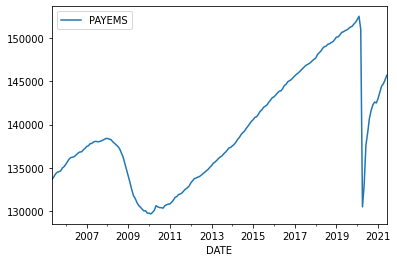

In [ ]:
df.plot() #plot the data then can right click the image-Copy and Paste into your doc

How about job losses? On https://fred.stlouisfed.org/categories search for 'job losses on layoff' yields LNS13023653 and 'Permanent Job Losers' is LNS13026638, so:

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['LNS13023653', 'LNS13026638'],
                    'fred', start, end)
df=df.rename(columns={"LNS13023653": "job losses on layoff", "LNS13026638": "perm job losses"})

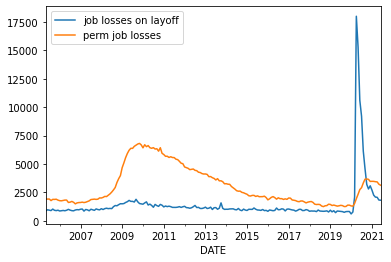

In [ ]:
df.plot()

What about a cross-section, say unemployment rate across NJ counties? Search for 'Unemployment Rate Atlantic County NJ' gets NJATLA2URN, and ''Unemployment Rate Atlantic County NJ' gets
NJCUMB2URN, so:


In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN'],
                    'fred', start, end)
df=df.rename(columns={"NJATLA2URN": "unemp atl", "NJCUMB2URN": "unemp cum"})

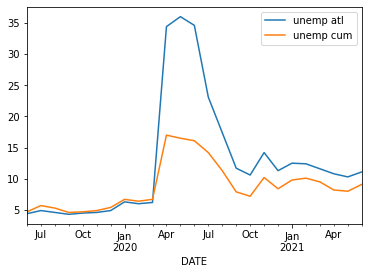

In [ ]:
df.plot()

Wow Atl got hit hard! Must be casinos, hotels, and dining! How about let's compare all of SJ at one point in time! So add few other counties:

NJATLA2URN atl

NJCUMB2URN cumberland

NJSALE5URN salem

NJGLOU5URN gloucester

NJCAMD7URN camden

NJBURL0URN burlington

NJCAPE1URN cape may

NJOCEA5URN ocean

And lets do pre-pandemic and after pandemic

In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2019, 6, 1)

dfPre = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPre=dfPre.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

#below is the same just 2020, and called "Post"
start = datetime.datetime (2020, 6, 1)
end = datetime.datetime (2020, 6, 1)

dfPost = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPost=dfPost.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

In [ ]:
dfPre

atl  cum  sal  glo  cam  bur  cap may  ocean
DATE                                                    
2019-06-01  4.4  4.7  4.4  3.4  3.8  3.0      4.2    3.2

[]

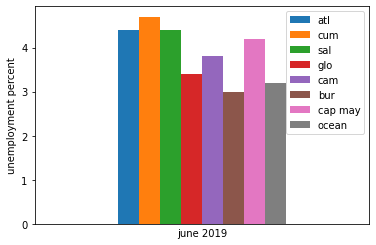

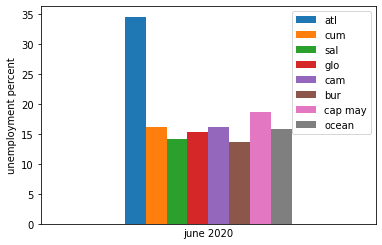

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

Interesting! Looks like there were similar and then atl shot up; but remember about scaling of y axis!, if you make both same scale:


[]

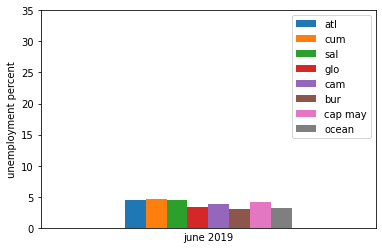

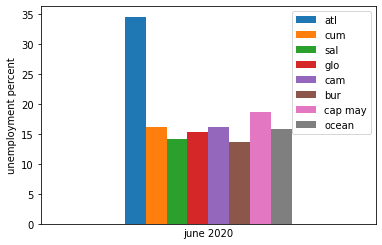

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])
ax.set_ylim(0,35)

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

#### World Bank
can actually search from within Py :)

In [ ]:
pdr.wb.search('gdp.*capita.*const')

id  \
691      6.0.GDPpc_constant   
10978        NY.GDP.PCAP.KD   
10980        NY.GDP.PCAP.KN   
10982     NY.GDP.PCAP.PP.KD   
10983  NY.GDP.PCAP.PP.KD.87   

                                                    name unit  \
691    GDP per capita, PPP (constant 2011 internation...        
10978                 GDP per capita (constant 2015 US$)        
10980                      GDP per capita (constant LCU)        
10982  GDP per capita, PPP (constant 2017 internation...        
10983  GDP per capita, PPP (constant 1987 internation...        

                             source  \
691                  LAC Equity Lab   
10978  World Development Indicators   
10980  World Development Indicators   
10982  World Development Indicators   
10983         WDI Database Archives   

                                              sourceNote  \
691    GDP per capita based on purchasing power parit...   
10978  GDP per capita is gross domestic product divid...   
10980  GDP per capita is gross domestic product divid...   
10982  GDP per capita based on purchasing power parit...   
10983                                                      

                                      sourceOrganization            topics  
691         b'World Development Indicators (World Bank)'  Economy & Growth  
10978  b'World Bank national accounts data, and OECD ...  Economy & Growth  
10980  b'World Bank national accounts data, and OECD ...  Economy & Growth  
10982  b'International Comparison Program, World Bank...  Economy & Growth  
10983                                                b''

In [ ]:
dat = pdr.wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2015).stack().unstack(0)

In [ ]:
datNoInd=dat
datNoInd.index=dat.index.droplevel(-1)
datNoInd

country        Canada       Mexico  United States
year                                             
2005     40989.526824  8925.255441   52789.731419
2006     41646.414637  9200.421932   53738.091725
2007     42098.431220  9288.182014   54299.617241
2008     42063.240117  9276.074347   53854.160612
2009     40368.931509  8677.776544   51996.183495
2010     41156.145186  9001.705095   52963.464170
2011     42037.518741  9199.165380   53394.861838
2012     42315.807389  9401.997684   54213.459552
2013     42846.284196  9404.616060   54830.784066
2014     43635.095481  9553.286174   55675.386854
2015     43596.135537  9753.400562   56762.729452

Text(0.5, 0, 'year')

Text(0, 0.5, 'PCGDP,constant 2010 USD')

Text(0.5, 1.0, 'my title')

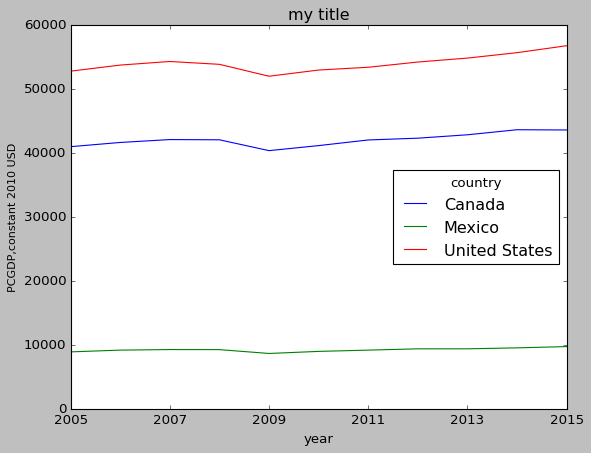

In [ ]:
ax=datNoInd.plot()
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('PCGDP,constant 2010 USD', fontsize=10)
ax.set_title('my title')

Now imagine you want to compare GDP to the Unemployment rate.

In [ ]:
pdr.wb.search('unemp.*').iloc[:,:2]

id  \
947              9.0.Unemp.All   
948              9.0.Unemp.B40   
949              9.0.Unemp.T60   
965              9.1.Unemp.All   
966              9.1.Unemp.B40   
...                        ...   
17761  per_lm_alllm.cov_q1_tot   
17765  per_lm_alllm.cov_q2_tot   
17769  per_lm_alllm.cov_q3_tot   
17773  per_lm_alllm.cov_q4_tot   
17777  per_lm_alllm.cov_q5_tot   

                                                    name  
947                                       Unemployed (%)  
948                     Unemployed-Bottom 40 Percent (%)  
949                        Unemployed-Top 60 Percent (%)  
965                                 Unemployed (%), Male  
966               Unemployed-Bottom 40 Percent (%), Male  
...                                                  ...  
17761  Coverage of unemployment benefits and ALMP in ...  
17765  Coverage of unemployment benefits and ALMP in ...  
17769  Coverage of unemployment benefits and ALMP in ...  
17773  Coverage of unemployment benefits and ALMP in ...  
17777  Coverage of unemployment benefits and ALMP in ...  

[73 rows x 2 columns]

In [ ]:
dat = pdr.wb.download(indicator=['NY.GDP.PCAP.KD','SL.UEM.TOTL.NE.ZS'], country=['US', 'CA', 'MX'], start=2015, end=2020)

In [ ]:
#dat
#lets sort it by year within each country
dat=dat.sort_values(['country', 'year'], ascending=[True, True])
dat

NY.GDP.PCAP.KD  SL.UEM.TOTL.NE.ZS
country       year                                   
Canada        2015    43596.135537               6.91
              2016    43536.913403               7.00
              2017    44325.488337               6.34
              2018    44917.483728               5.83
              2019    45109.244486               5.66
              2020    42258.691017               9.46
Mexico        2015     9753.380048               4.31
              2016     9897.150062               3.86
              2017     9997.686914               3.42
              2018    10120.363543               3.27
              2019    10013.703192               3.48
              2020     9147.053505               4.45
United States 2015    56762.729452               5.28
              2016    57292.538783               4.87
              2017    58207.578310               4.36
              2018    59607.393660               3.90
              2019    60698.011299               3.67
              2020    58453.446128               8.05

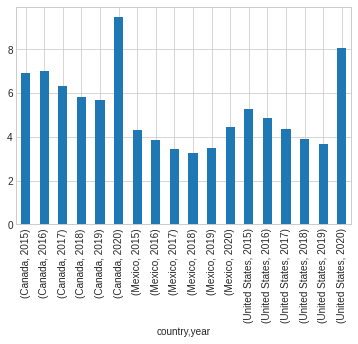

In [ ]:
ax=dat['SL.UEM.TOTL.NE.ZS'].plot(kind="bar")

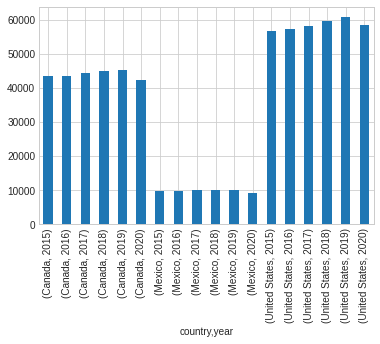

In [ ]:
ax=dat['NY.GDP.PCAP.KD'].plot(kind="bar")

#### [*] imdb

i love movies, so i google:
https://www.google.com/search?q=imdb+python+api&rlz=1CAKDZI_enUS997US997&oq=imdb+python&aqs=chrome.1.69i57j0i512l3j0i22i30j0i15i22i30l2j0i10i15i22i30j0i22i30l2.4757j0j7&sourceid=chrome&ie=UTF-8

and first hit:
https://www.geeksforgeeks.org/python-imdbpy-searching-a-movie/

<br>then readthedocs:
https://imdbpy.readthedocs.io/en/latest/usage/quickstart.html#searching

In [ ]:
! pip install IMDbPY

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 5.7 MB/s eta 0:00:00


In [ ]:
import imdb
# creating an instance of the IMDB()
ia = imdb.IMDb()

In [ ]:
items = ia.search_movie('Seven')
for i in items:
    print(i)

Se7en
Seven Samurai
Seven Psychopaths
Seven Pounds
The Magnificent Seven
Furious 7
Seven Seconds
7:11 PM
Seven Brides for Seven Brothers
Scissor Seven
Seven Years in Tibet
The Magnificent Seven
Seven Thieves
Seven Veils
Seven
Snow White and the Seven Dwarfs
The Trial of the Chicago 7
Seven Days Ashore
The Last Kingdom: Seven Kings Must Die
Six Days Seven Nights


In [ ]:
items[0]

<Movie id:0114369[http] title:_Se7en (1995)_>

In [ ]:
people = ia.search_person('Mel Gibson')
for person in people:
   print(person.personID, person['name'])

0000154 Mel Gibson
12550288 Mel Gibson
0317112 Mel Gibson
2153167 Mel Gibson
15271356 Mel Gibson
4798507 Mel A. Gibson
3323885 Adam Taylor
2800055 Mel Gibson
3742421 Melina Mari Bryant
0317096 Meg Gibson
0879085 Tyrese Gibson
0684545 Julie Pinson
8908771 Millie Gibson
0316995 Hoot Gibson
0316945 Donal Gibson
4047961 Noel Gibson
6521923 Mel Gibbon
2988370 Mal Gibson
0316932 Dean Paul Gibson
0316878 Cal Gibson


In [ ]:
people[0]

<Person id:0000154[http] name:_Mel Gibson_>

In [ ]:
actorID='0000154'
print(ia.get_person(actorID))

Mel Gibson


In [ ]:
actor_results = ia.get_person_filmography(actorID)

In [ ]:
#actor_results #prints a ton of info but i see can simplify by subsetting first to data filmography and actor

In [ ]:
par=actor_results['data']['filmography']['actor'] #and so i do subset
par

[<Movie id:16101924[http] title:_Lethal Weapon 5 (None)_>,
 <Movie id:10993078[http] title:_Boneyard (None)_>,
 <Movie id:3954936[http] title:_Boys of Summer (None)_>,
 <Movie id:14633464[http] title:_Desperation Road (2023)_>,
 <Movie id:6486762[http] title:_The Continental: From the World of John Wick (2023)_>,
 <Movie id:21391242[http] title:_Confidential Informant (2023)_>,
 <Movie id:14824590[http] title:_On the Line (None)_>,
 <Movie id:9853500[http] title:_Bandit (2022)_>,
 <Movie id:15690300[http] title:_Hot Seat (2022)_>,
 <Movie id:14439896[http] title:_Father Stu (2022)_>,
 <Movie id:14168394[http] title:_Agent Game (2022)_>,
 <Movie id:4029412[http] title:_Panama (2022)_>,
 <Movie id:9244554[http] title:_Last Looks (None)_>,
 <Movie id:3876910[http] title:_Dangerous (None)_>,
 <Movie id:10310140[http] title:_Fatman (2020)_>,
 <Movie id:10308928[http] title:_Force of Nature (2020)_>,
 <Movie id:7638348[http] title:_Boss Level (2020)_>,
 <Movie id:5932728[http] title:_The Pro

In [ ]:
par[0]

<Movie id:16101924[http] title:_Lethal Weapon 5 (None)_>

In [ ]:
dir(par[0]) #dir super useful lists content of an object

In [ ]:
par[0].movieID

'16101924'

In [ ]:
par[0].data['title']

'Lethal Weapon 5'

In [ ]:
[par[0].movieID,par[0].data['title']] #so thats what i need

['16101924', 'Lethal Weapon 5']

In [ ]:
#now just loop over the items to create a dataframe
idTit=[] #first an empty list
for i in enumerate(par): #start loop with enumerate to create counter 1,2,3...
  #print(i[0]) #at first wanted to see what it does
  idTit.append([par[i[0]].movieID,par[i[0]].data['title']]) #and then just append to the list useful info
#idTit  #so i got list of lists
df = pd.DataFrame(idTit,columns=['id','tit']) #and then just convert to the dataframe
df

id                                           tit
0   16101924                               Lethal Weapon 5
1   10993078                                      Boneyard
2    3954936                                Boys of Summer
3   14633464                              Desperation Road
4    6486762  The Continental: From the World of John Wick
..       ...                                           ...
71   0079501                                       Mad Max
72   3238528                                      The Hero
73   0082201                                      Cop Shop
74   0075281                                 The Sullivans
75   0076780                                   Summer City

[76 rows x 2 columns]

In [ ]:
#but then lets say i want geography for merging and maybe other info--lets see whats available
print(ia.get_movie_infoset()) #but thats only in theory

['airing', 'akas', 'alternate versions', 'awards', 'connections', 'crazy credits', 'critic reviews', 'episodes', 'external reviews', 'external sites', 'faqs', 'full credits', 'goofs', 'keywords', 'list', 'locations', 'main', 'misc sites', 'news', 'official sites', 'parents guide', 'photo sites', 'plot', 'quotes', 'recommendations', 'release dates', 'release info', 'reviews', 'sound clips', 'soundtrack', 'synopsis', 'taglines', 'technical', 'trivia', 'tv schedule', 'video clips', 'vote details']


In [ ]:
the_matrix = ia.get_movie('0133093') #actual movies have less info but still pretty awesome:
print(sorted(the_matrix.keys()))

['akas', 'animation department', 'art department', 'art direction', 'aspect ratio', 'assistant director', 'box office', 'camera and electrical department', 'canonical title', 'cast', 'casting department', 'casting director', 'certificates', 'cinematographer', 'color info', 'composer', 'costume department', 'costume designer', 'countries', 'country codes', 'cover url', 'director', 'distributors', 'editor', 'editorial department', 'full-size cover url', 'genres', 'imdbID', 'kind', 'language codes', 'languages', 'localized title', 'location management', 'long imdb canonical title', 'long imdb title', 'make up', 'miscellaneous crew', 'music department', 'original air date', 'original title', 'other companies', 'plot', 'plot outline', 'producer', 'production companies', 'production design', 'production manager', 'rating', 'runtimes', 'script department', 'set decoration', 'smart canonical title', 'smart long imdb canonical title', 'sound crew', 'sound mix', 'special effects', 'special effec

In [ ]:
the_matrix['reviews'][0]

{'content': 'When this came out, I was living with a roommate. He went out and saw it, came home and said, "Dude, you have to go see The Matrix." So we left and he sat through it a second time. This movie is splendidly done. The mystery about what the Matrix is, unravels and you see a dystopian future unlike any we as a race would want. I have watched this over and over and never tire of it. Everyone does a great job acting in this, the special effects are above par and the story is engaging.',
 'helpful': 171,
 'title': 'Just wow',
 'author': 'ur96416540',
 'date': '1 November 2019',
 'rating': 10,
 'not_helpful': 11}

In [ ]:
bh = ia.get_movie('0112573') #https://www.imdb.com/title/tt0112573/
print(sorted(bh.keys()))

['akas', 'art department', 'art direction', 'aspect ratio', 'assistant director', 'box office', 'camera and electrical department', 'canonical title', 'cast', 'casting department', 'casting director', 'certificates', 'cinematographer', 'color info', 'composer', 'costume department', 'costume designer', 'countries', 'country codes', 'cover url', 'director', 'distributors', 'editor', 'editorial department', 'full-size cover url', 'genres', 'imdbID', 'kind', 'language codes', 'languages', 'localized title', 'location management', 'long imdb canonical title', 'long imdb title', 'make up', 'miscellaneous crew', 'music department', 'original air date', 'original title', 'other companies', 'plot', 'plot outline', 'producer', 'production companies', 'production design', 'production manager', 'rating', 'runtimes', 'script department', 'set decoration', 'smart canonical title', 'smart long imdb canonical title', 'sound crew', 'sound mix', 'special effects', 'special effects companies', 'stunt pe

In [ ]:
bh['country'],bh['plot']

(['United States'],
 ['Scottish warrior William Wallace leads his countrymen in a rebellion to free his homeland from the tyranny of King Edward I of England.',
  "William Wallace is a Scottish rebel who leads an uprising against the cruel English ruler Edward the Longshanks, who wishes to inherit the crown of Scotland for himself. When he was a young boy, William Wallace's father and brother, along with many others, lost their lives trying to free Scotland. Once he loses another of his loved ones, William Wallace begins his long quest to make Scotland free once and for all, along with the assistance of Robert the Bruce.—Anonymous",
  'Tells the story of the legendary thirteenth century Scottish hero named William Wallace. Wallace rallies the Scottish against the English monarch and Edward I after he suffers a personal tragedy by English soldiers. Wallace gathers a group of amateur warriors that is stronger than any English army.—Jwelch5742',
  "Scotland, 1280. With England oppressed b

In [ ]:
df.head(3) #ok back to our data

tit c plot
id                              
16101924  Lethal Weapon 5       
10993078         Boneyard       
3954936    Boys of Summer

In [ ]:
df['c'] = "" #create empty columns
df['plot'] = ""
df.set_index("id", inplace = True) #and set index to mov id

In [ ]:
for i in df.head(5).index: #and loop through and using index fill in cells with country and plot :)
  #print(i)
  #print(ia.get_movie(i)['country'])
  #df.tit[i]
  df['c'][i]=ia.get_movie(i)['country']
  df['plot'][i]=ia.get_movie(i)['plot']

In [ ]:
df.head(5)

tit                c  \
id                                                                        
16101924                               Lethal Weapon 5  [United States]   
10993078                                      Boneyard  [United States]   
3954936                                 Boys of Summer  [United States]   
14633464                              Desperation Road  [United States]   
6486762   The Continental: From the World of John Wick  [United States]   

                                                       plot  
id                                                           
16101924                           [Plot kept under wraps.]  
10993078  [Inspired by the true events of a serial kille...  
3954936   [In the summer of 1997, a local boy and his fr...  
14633464  [A Southern Noir thriller, set in a tough-and-...  
6486762   [Set in 1970s New York City, The Continental e...

# [nov14] [*] non-pandas extras/bonus

what follows is extra/bonus (not required)

### imputations

in real world missing data is almost always a problem and there are ways to impute it (fill it in)--it helps, the more data the better, but do keep in mind that it is still imputed data and must always note it in your writeup

in particular do think if the data are MNAR (Missing Not At Random), eg income missing bc rich people dont report it, ie its missing if its high; if data are MNAR then imputations won't be great and won't figure out the reason for MNAR, so you have to do the thinking: why its missing?!

in general:

 -as always, try to get more data and triangulate, a no brainer (eg gss data--much of personal income missing, so i use hh income)

 -dont drop missing obs, it drops the whole row (so called 'liswise deletion'), other cols may stil have non missing data that can be used (eg pairwise corr)

 -want to do multiple imputations, in Python: MICE; and do compare to results without imputations, hopefuly substantively similar just little stronger effect sizes and more stat significant; but if very different then maybe imputations dont make sense

REFS:

https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87 love it especially thats visual showing imputed against real data in graphs

https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values

https://www.kaggle.com/code/residentmario/simple-techniques-for-missing-data-imputation

<br>if you have time series data:
https://www.section.io/engineering-education/missing-values-in-time-series/
and https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87 (nice vis with coloring)

<br>LESS USEFUL REFS:


https://pandas.pydata.org/docs/user_guide/missing_data.html pandas documentation (not very useful)

https://www.kdnuggets.com/5-steps-getting-started-scikit-learn means only example (but do more)

https://scikit-learn.org/stable/modules/impute.html scikit documentation/reference

In [ ]:
#https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87
#https://github.com/Idilismiguzel/data_analysis/blob/main/missing_data/Missing_Value_Imputation.ipynb

from sklearn.impute import SimpleImputer
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/theaok/data/main/travel-times.csv', parse_dates=[['Date', 'StartTime']], index_col='Date_StartTime')
#generate some random missing on MaxSpeed
mask = np.random.choice([True, False], size=df['MaxSpeed'].shape, p=[0.1, 0.9])
mask[mask.all(),-1] = 0
df['MaxSpeed'] = df['MaxSpeed'].mask(mask)

df.head(3)

DayOfWeek GoingTo  Distance  MaxSpeed  AvgSpeed  \
Date_StartTime                                                         
2012-01-06 16:37:00     Friday    Home     51.29     127.4      78.3   
2012-01-06 08:20:00     Friday     GSK     51.63     130.3      81.8   
2012-01-04 16:17:00  Wednesday    Home     51.27     127.4      82.0   

                     AvgMovingSpeed FuelEconomy  TotalTime  MovingTime  \
Date_StartTime                                                           
2012-01-06 16:37:00            84.8         NaN       39.3        36.3   
2012-01-06 08:20:00            88.9         NaN       37.9        34.9   
2012-01-04 16:17:00            85.8         NaN       37.5        35.9   

                    Take407All Comments  
Date_StartTime                           
2012-01-06 16:37:00         No      NaN  
2012-01-06 08:20:00         No      NaN  
2012-01-04 16:17:00         No      NaN

In [ ]:
df.info() #can see missing info
#df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2012-01-06 16:37:00 to 2011-07-11 16:56:00
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DayOfWeek       205 non-null    object 
 1   GoingTo         205 non-null    object 
 2   Distance        205 non-null    float64
 3   MaxSpeed        188 non-null    float64
 4   AvgSpeed        205 non-null    float64
 5   AvgMovingSpeed  205 non-null    float64
 6   FuelEconomy     188 non-null    object 
 7   TotalTime       205 non-null    float64
 8   MovingTime      205 non-null    float64
 9   Take407All      205 non-null    object 
 10  Comments        24 non-null     object 
dtypes: float64(6), object(5)
memory usage: 19.2+ KB


<Axes: >

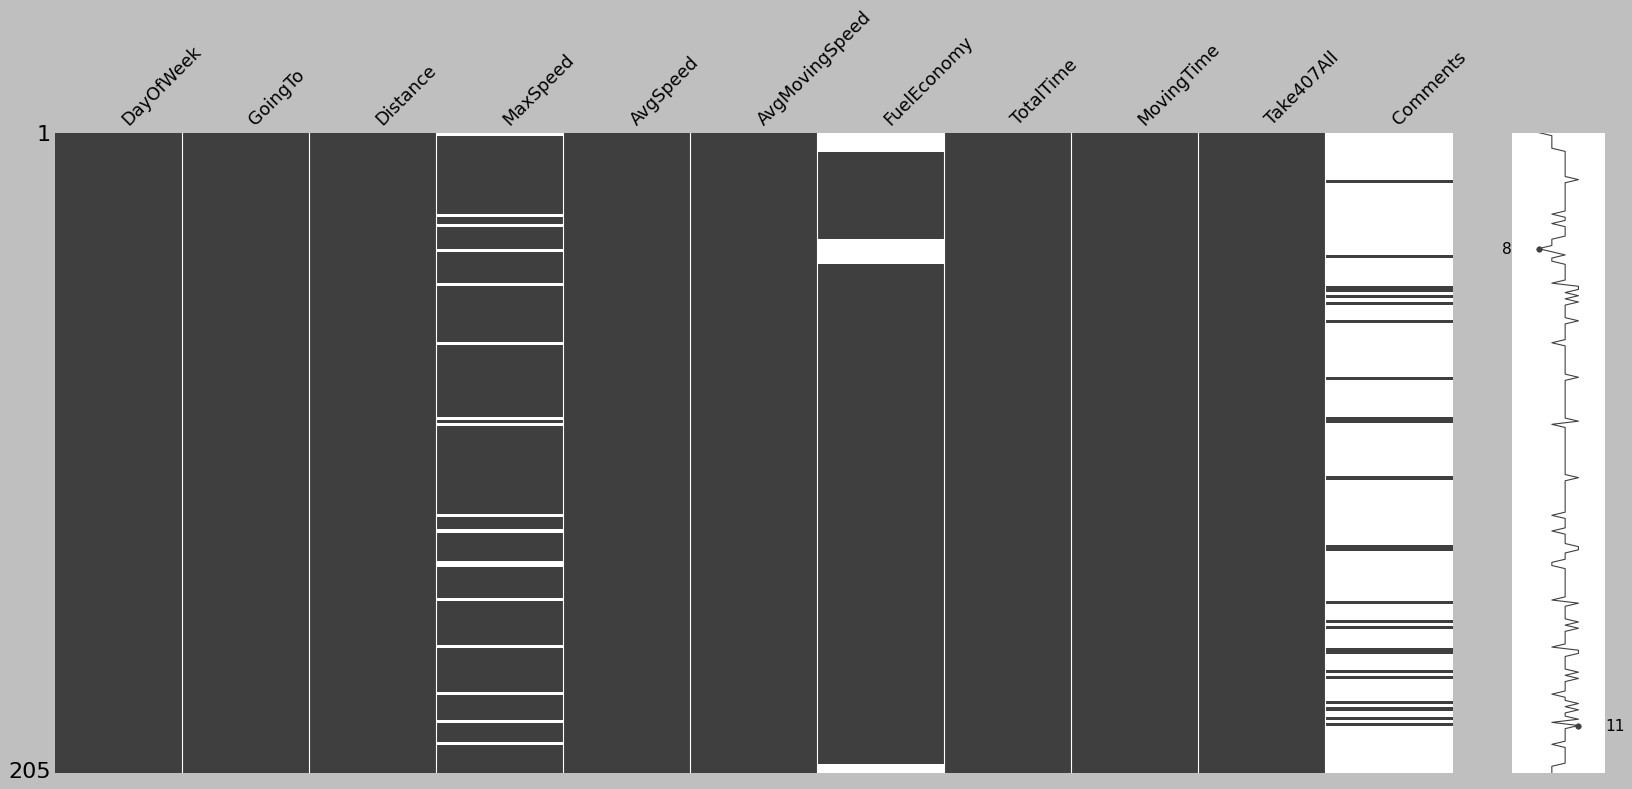

In [ ]:
#super handy always use it! (on the very right how much missingness in a row)
#shows relationships in missingness across vars;
#but can also get a huch if sth missing at random especially if sorted right;
#eg here MaxSpeed looks random with respect this sorting
#and it does help to see if the listwise deletion may be a severe problem: 10% NaN on 10vars can result in 10-100% NaN!!!
msno.matrix(df)

#an alternative would be sns heatmap
#import seaborn as sns
#sns.heatmap(df.isnull(),
#            yticklabels=False,
#            cbar=False,
#            cmap='viridis')

In [ ]:
#likewise, handy: how missingness on one impacts others
#msno.heatmap(df) #here not useful as just 2 vars with few missing, but if many vars many missing useful! see:
#https://github.com/ResidentMario/missingno
#https://www.kaggle.com/code/residentmario/using-missingno-to-diagnose-data-sparsity

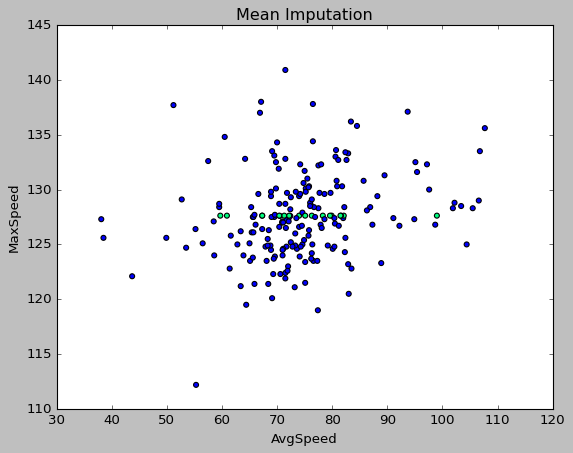

In [ ]:
# Mean Imputation [simplistic; not super useful]
from sklearn.impute import SimpleImputer
df_mean = df.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean") # "most_frequent" for mode
df_mean['MaxSpeed'] = mean_imputer.fit_transform(df_mean['MaxSpeed'].values.reshape(-1,1))
fig = plt.Figure()
null_values = df["MaxSpeed"].isnull()
fig = df_mean.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

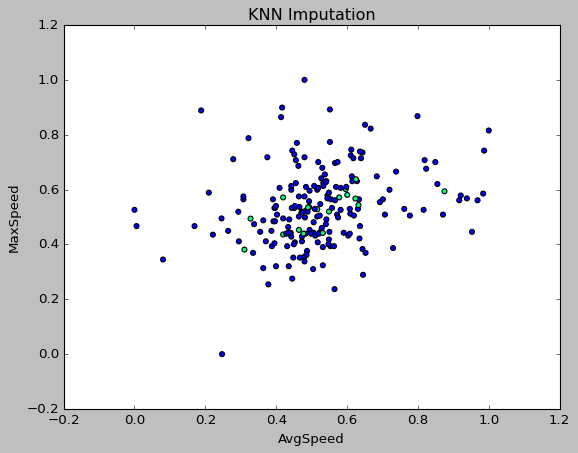

In [ ]:
# KNNImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

df_knn = df.filter(['Distance',	'MaxSpeed',	'AvgSpeed',	'AvgMovingSpeed'], axis=1).copy() #KNNImputer works with continuous, discrete/categorical, but not text

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

fig = plt.Figure()
null_values = df["MaxSpeed"].isnull()
fig = df_knn_imputed.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)

MICE Multivariate Imputation by Chained Equation

MICE algorithm is probably one of the most used imputation techniques

MICE first calculates the mean of every column where there is a missing value and uses the mean value as a placeholder. Then it runs a series of regression models (chained equations) to impute each missing value sequentially. Like in any regression model, MICE uses a feature matrix and target variable to train, and in this case, the target variable is the column with missing values. MICE predicts and updates missing values on target columns. Iteratively, MICE repeats this process several times by constantly changing the placeholder variables with the predictions from the previous iteration. In the end, it reaches a robust estimation.
https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87

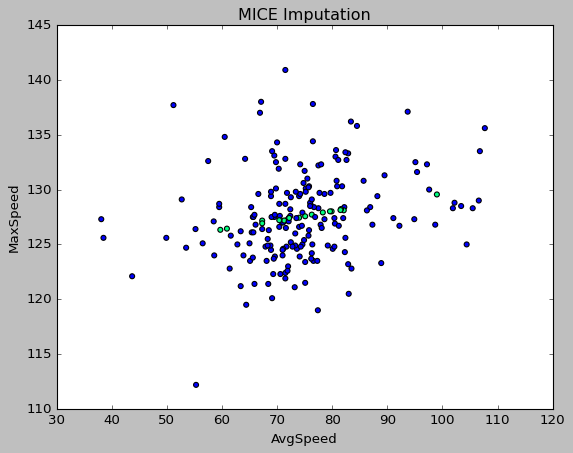

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df.filter(['Distance',	'MaxSpeed',	'AvgSpeed',	'AvgMovingSpeed'], axis=1).copy()

mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)
fig = plt.Figure()
null_values = df["MaxSpeed"].isnull()
fig = df_mice_imputed.plot(x="AvgSpeed", y="MaxSpeed", kind="scatter", c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)

TODO
https://towardsdatascience.com/all-about-missing-data-handling-b94b8b5d2184

## fuzzywuzzy

(and lets see str and regexp sec above--important and i beefed up a bit 6nov2023)

https://www.geeksforgeeks.org/fuzzywuzzy-python-library/

https://www.geeksforgeeks.org/how-to-do-fuzzy-matching-on-pandas-dataframe-column-using-python/

love these sheep pics!!:

https://www.google.com/search?q=fuzzywuzzy+2+sheeps&tbm=isch&source=lnms

https://www.google.com/search?q=sheep+clones&tbm=isch&source=lnms

OTHER REFS: (probabilistic merge: other ideas)

https://pbpython.com/record-linking.html

https://pnut2357.github.io/data-matching/

https://towardsdatascience.com/surprisingly-effective-way-to-name-matching-in-python-1a67328e670e

https://www.robinlinacre.com/introducing_splink/

https://towardsdatascience.com/text-similarity-w-levenshtein-distance-in-python-2f7478986e75 check for plagiarism using Levenshtein distance using wikipedia

Levenshtein Distance https://openrefine.org/docs/manual/cellediting

Levenshtein distance counts the number of edits required to make one value perfectly match another[...] it will do things like change uppercase to lowercase, fix whitespace, change special characters, etc. Each character that gets changed counts as 1 “distance.” “New York” and “newyork” have an edit distance value of 3 (“N” to “n”; “Y” to “y”; remove the space).

It can do relatively advanced edits, such as understanding the distance between “M. Makeba” and “Miriam Makeba” (5), but it may create false positives if these distances are greater than other, simpler transformations--such as the one-character distance to “B. Makeba,” another person entirely!!!

In [ ]:
!pip install fuzzywuzzy
#import fuzzywuzzy
#from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
#https://medium.com/@chrostowski.pawel/fuzzywuzzy-and-pandas-similarities-in-data-c6b24caf7b87
df1 = pd.DataFrame({
    'old_price':[1,4,3.5,0.7,0.8],
    'name':['milk','cheese white','cheese yellow','pepper r','apples']
})

df2 = pd.DataFrame({
    'new_price':[1.4,4.2,3.5,0.7,0.9],
    'name':['lf milk','white cheese','yellow cheese','pepper red','apples']
})

df1['match']=''
df1['matchOne']=''


df1
df2

old_price           name match matchOne
0        1.0           milk               
1        4.0   cheese white               
2        3.5  cheese yellow               
3        0.7       pepper r               
4        0.8         apples

new_price           name
0        1.4        lf milk
1        4.2   white cheese
2        3.5  yellow cheese
3        0.7     pepper red
4        0.9         apples

In [ ]:
query=df1.name[0]
query
choices=df2.name.to_list()
choices

'milk'

['lf milk', 'white cheese', 'yellow cheese', 'pepper red', 'apples']

In [ ]:
process.extract(query, choices)

[('lf milk', 90),
 ('white cheese', 22),
 ('yellow cheese', 22),
 ('apples', 22),
 ('pepper red', 0)]

In [ ]:
df1.name

0             milk
1     cheese white
2    cheese yellow
3         pepper r
4           apples
Name: name, dtype: object

In [ ]:
for item in df1.name:
  print(item)

milk
cheese white
cheese yellow
pepper r
apples


In [ ]:
for i in df1.name:
  #print(i[1])
  a=process.extract(i, df2.name.to_list(), limit=2)
  df1.loc[df1['name']==i, 'match']  = str(a)
df1

old_price           name                                          match  \
0        1.0           milk        [('lf milk', 90), ('white cheese', 22)]   
1        4.0   cheese white  [('white cheese', 95), ('yellow cheese', 64)]   
2        3.5  cheese yellow  [('yellow cheese', 95), ('white cheese', 64)]   
3        0.7       pepper r           [('pepper red', 89), ('apples', 43)]   
4        0.8         apples          [('apples', 100), ('pepper red', 45)]   

  matchOne  
0           
1           
2           
3           
4

In [ ]:
for i in df1.name:
  #print(i[1])
  a=process.extractOne(i, df2.name.to_list())[0] #get best match only
  df1.loc[df1['name']==i, 'matchOne']  = str(a)
df1

old_price           name                                          match  \
0        1.0           milk        [('lf milk', 90), ('white cheese', 22)]   
1        4.0   cheese white  [('white cheese', 95), ('yellow cheese', 64)]   
2        3.5  cheese yellow  [('yellow cheese', 95), ('white cheese', 64)]   
3        0.7       pepper r           [('pepper red', 89), ('apples', 43)]   
4        0.8         apples          [('apples', 100), ('pepper red', 45)]   

        matchOne  
0        lf milk  
1   white cheese  
2  yellow cheese  
3     pepper red  
4         apples

In [ ]:
#https://www.geeksforgeeks.org/how-to-do-fuzzy-matching-on-pandas-dataframe-column-using-python/
dict1 = {'name': ["aparna", "pankaj",
                  "sudhir", "Geeku"]}
dict2 = {'name': ["aparn", "arup", "Pankaj",
                  "sudhir c", "Geek", "abc"]}
df1 = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)

df1['match']=''
df1['matchOne']=''

df1
df2

name match matchOne
0  aparna               
1  pankaj               
2  sudhir               
3   Geeku

name
0     aparn
1      arup
2    Pankaj
3  sudhir c
4      Geek
5       abc

In [ ]:
query=df1.name[0]
query
choices=df2.name.to_list()
choices

'aparna'

['aparn', 'arup', 'Pankaj', 'sudhir c', 'Geek', 'abc']

In [ ]:
process.extract(query, choices)

[('lf milk', 90),
 ('white cheese', 22),
 ('yellow cheese', 22),
 ('apples', 22),
 ('pepper red', 0)]

In [ ]:
for i in df1.name:
  #print(i[1])
  a=process.extract(i, df2.name.to_list(), limit=2)
  df1.loc[df1['name']==i, 'match']  = str(a)
df1

name                             match matchOne
0  aparna   [('aparn', 91), ('Pankaj', 67)]         
1  pankaj  [('Pankaj', 100), ('aparn', 55)]         
2  sudhir  [('sudhir c', 95), ('arup', 30)]         
3   Geeku      [('Geek', 89), ('arup', 22)]

In [ ]:
for i in df1.name:
  #print(i[1])
  a=process.extractOne(i, df2.name.to_list())[0] #get best match only
  df1.loc[df1['name']==i, 'matchOne']  = str(a)
df1
#note its case insensitive pankaj v Pankaj is 100

name                             match  matchOne
0  aparna   [('aparn', 91), ('Pankaj', 67)]     aparn
1  pankaj  [('Pankaj', 100), ('aparn', 55)]    Pankaj
2  sudhir  [('sudhir c', 95), ('arup', 30)]  sudhir c
3   Geeku      [('Geek', 89), ('arup', 22)]      Geek

### actual merge

In [ ]:

isA=pd.read_csv('https://raw.githubusercontent.com/theaok/data/main/iStatesA.csv')
isB=pd.read_csv('https://raw.githubusercontent.com/theaok/data/main/iStatesB.csv')
del isA['totpopmale']
del isA['Unnamed: 0']

del isB['best_match']
del isB['Unnamed: 0']

In [ ]:
isA[['STATE']]

STATE
0   ANDAMAN & NICOBAR ISLANDS
1              ANDHRA PRADESH
2           ARUNACHAL PRADESH
3                       ASSAM
4                       BIHAR
5                  CHANDIGARH
6                 CHHATISGARH
7        DADRA & NAGAR HAVELI
8                 DAMAN & DIU
9                         GOA
10                    GUJARAT
11                    HARYANA
12           HIMACHAL PRADESH
13            JAMMU & KASHMIR
14                  JHARKHAND
15                  KARNATAKA
16                     KERALA
17                     LADAKH
18                LAKSHADWEEP
19             MADHYA PRADESH
20                MAHARASHTRA
21                    MANIPUR
22                  MEGHALAYA
23                    MIZORAM
24               NCT OF DELHI
25                   NAGALAND
26                     ORISSA
27                PONDICHERRY
28                     PUNJAB
29                  RAJASTHAN
30                     SIKKIM
31                 TAMIL NADU
32                  TELANGANA
33                    TRIPURA
34              UTTAR PRADESH
35                UTTARAKHAND
36                WEST BENGAL

In [ ]:
isB[['STATE']]

STATE
0         A&N ISLANDS
1      ANDHRA PRADESH
2   ARUNACHAL PRADESH
3               ASSAM
4               BIHAR
5          CHANDIGARH
6        CHHATTISGARH
7          D&N HAVELI
8         DAMAN & DIU
9            DELHI UT
10                GOA
11            GUJARAT
12            HARYANA
13   HIMACHAL PRADESH
14    JAMMU & KASHMIR
15          JHARKHAND
16          KARNATAKA
17             KERALA
18        LAKSHADWEEP
19     MADHYA PRADESH
20        MAHARASHTRA
21            MANIPUR
22          MEGHALAYA
23            MIZORAM
24           NAGALAND
25             ODISHA
26         PUDUCHERRY
27             PUNJAB
28          RAJASTHAN
29             SIKKIM
30         TAMIL NADU
31          TELANGANA
32            TRIPURA
33      UTTAR PRADESH
34        UTTARAKHAND
35        WEST BENGAL

In [ ]:
pd.merge(isA,isB,on='STATE',how='outer',indicator=True).sort_values('STATE')

STATE  distarea   totalpopul  \
37                A&N ISLANDS       NaN          NaN   
0   ANDAMAN & NICOBAR ISLANDS    8249.0     380581.0   
1              ANDHRA PRADESH  160205.0   49386799.0   
2           ARUNACHAL PRADESH   83743.0    1383727.0   
3                       ASSAM   78438.0   31205576.0   
4                       BIHAR   94163.0  104099452.0   
5                  CHANDIGARH     114.0    1055450.0   
6                 CHHATISGARH  135192.0   25545198.0   
38               CHHATTISGARH       NaN          NaN   
39                 D&N HAVELI       NaN          NaN   
7        DADRA & NAGAR HAVELI     491.0     343709.0   
8                 DAMAN & DIU     111.0     243247.0   
40                   DELHI UT       NaN          NaN   
9                         GOA    3702.0    1458545.0   
10                    GUJARAT  196244.0   60439692.0   
11                    HARYANA   44212.0   25351462.0   
12           HIMACHAL PRADESH   55673.0    6864602.0   
13            JAMMU & KASHMIR   42241.0   12267013.0   
14                  JHARKHAND   79716.0   32988134.0   
15                  KARNATAKA  191791.0   61095297.0   
16                     KERALA   38852.0   33406061.0   
17                     LADAKH   59146.0     274289.0   
18                LAKSHADWEEP      30.0      64473.0   
19             MADHYA PRADESH  308252.0   72626809.0   
20                MAHARASHTRA  307713.0  112374333.0   
21                    MANIPUR   22327.0    2855794.0   
22                  MEGHALAYA   18610.0    2571765.0   
23                    MIZORAM   21081.0    1097206.0   
25                   NAGALAND   16579.0    1978502.0   
24               NCT OF DELHI    1483.0   16787941.0   
41                     ODISHA       NaN          NaN   
26                     ORISSA  155707.0   41974218.0   
27                PONDICHERRY     490.0    1247953.0   
42                 PUDUCHERRY       NaN          NaN   
28                     PUNJAB   50362.0   27743338.0   
29                  RAJASTHAN  342239.0   68548437.0   
30                     SIKKIM    7096.0     610577.0   
31                 TAMIL NADU  130060.0   72147030.0   
32                  TELANGANA       0.0   35003674.0   
33                    TRIPURA   10486.0    3673917.0   
34              UTTAR PRADESH  240928.0  199812341.0   
35                UTTARAKHAND   53483.0   10086292.0   
36                WEST BENGAL   88752.0   91276115.0   

    Total Cognizable IPC crimes      _merge  
37                       1492.0  right_only  
0                           NaN   left_only  
1                      229208.0        both  
2                        5686.0        both  
3                      188674.0        both  
4                      355190.0        both  
5                        6442.0        both  
6                           NaN   left_only  
38                     116400.0  right_only  
39                        554.0  right_only  
7                           NaN   left_only  
8                         466.0        both  
40                     311308.0  right_only  
9                        8932.0        both  
10                     262770.0        both  
11                     159894.0        both  
12                      28320.0        both  
13                      47696.0        both  
14                      90670.0        both  
15                     274676.0        both  
16                     413578.0        both  
17                          NaN   left_only  
18                        162.0        both  
19                     544846.0        both  
20                     499668.0        both  
21                       7282.0        both  
22                       7358.0        both  
23                       4280.0        both  
25                       2314.0        both  
24                          NaN   left_only  
41                     149138.0  right_only  
26                          NaN   left_only  
27                          NaN   left_on

In [ ]:
isA["matches"] = isA["STATE"].map(lambda x: process.extract(x,isB["STATE"].to_list(),limit=3))
isA #skim thru to make sure it mostly makes sense BUT pain, simplify in next cell

STATE  distarea   totalpopul  \
0   ANDAMAN & NICOBAR ISLANDS    8249.0     380581.0   
1              ANDHRA PRADESH  160205.0   49386799.0   
2           ARUNACHAL PRADESH   83743.0    1383727.0   
3                       ASSAM   78438.0   31205576.0   
4                       BIHAR   94163.0  104099452.0   
5                  CHANDIGARH     114.0    1055450.0   
6                 CHHATISGARH  135192.0   25545198.0   
7        DADRA & NAGAR HAVELI     491.0     343709.0   
8                 DAMAN & DIU     111.0     243247.0   
9                         GOA    3702.0    1458545.0   
10                    GUJARAT  196244.0   60439692.0   
11                    HARYANA   44212.0   25351462.0   
12           HIMACHAL PRADESH   55673.0    6864602.0   
13            JAMMU & KASHMIR   42241.0   12267013.0   
14                  JHARKHAND   79716.0   32988134.0   
15                  KARNATAKA  191791.0   61095297.0   
16                     KERALA   38852.0   33406061.0   
17                     LADAKH   59146.0     274289.0   
18                LAKSHADWEEP      30.0      64473.0   
19             MADHYA PRADESH  308252.0   72626809.0   
20                MAHARASHTRA  307713.0  112374333.0   
21                    MANIPUR   22327.0    2855794.0   
22                  MEGHALAYA   18610.0    2571765.0   
23                    MIZORAM   21081.0    1097206.0   
24               NCT OF DELHI    1483.0   16787941.0   
25                   NAGALAND   16579.0    1978502.0   
26                     ORISSA  155707.0   41974218.0   
27                PONDICHERRY     490.0    1247953.0   
28                     PUNJAB   50362.0   27743338.0   
29                  RAJASTHAN  342239.0   68548437.0   
30                     SIKKIM    7096.0     610577.0   
31                 TAMIL NADU  130060.0   72147030.0   
32                  TELANGANA       0.0   35003674.0   
33                    TRIPURA   10486.0    3673917.0   
34              UTTAR PRADESH  240928.0  199812341.0   
35                UTTARAKHAND   53483.0   10086292.0   
36                WEST BENGAL   88752.0   91276115.0   

                                              matches  
0   [(A&N ISLANDS, 86), (DAMAN & DIU, 74), (BIHAR,...  
1   [(ANDHRA PRADESH, 100), (MADHYA PRADESH, 86), ...  
2   [(ARUNACHAL PRADESH, 100), (HIMACHAL PRADESH, ...  
3   [(ASSAM, 100), (JAMMU & KASHMIR, 54), (LAKSHAD...  
4      [(BIHAR, 100), (ODISHA, 55), (CHANDIGARH, 54)]  
5   [(CHANDIGARH, 100), (CHHATTISGARH, 73), (GOA, ...  
6   [(CHHATTISGARH, 96), (CHANDIGARH, 76), (GOA, 60)]  
7       [(D&N HAVELI, 86), (GOA, 60), (NAGALAND, 56)]  
8   [(DAMAN & DIU, 100), (MANIPUR, 61), (TAMIL NAD...  
9   [(GOA, 100), (CHANDIGARH, 60), (CHHATTISGARH, ...  
10  [(GUJARAT, 100), (MAHARASHTRA, 51), (UTTARAKHA...  
11  [(HARYANA, 100), (JHARKHAND, 62), (MAHARASHTRA...  
12  [(HIMACHAL PRADESH, 100), (MADHYA PRADESH, 80)...  
13  [(JAMMU & KASHMIR, 100), (ASSAM, 54), (MIZORAM...  
14  [(JHARKHAND, 100), (UTTARAKHAND, 70), (HARYANA...  
15  [(KARNATAKA, 100), (ARUNACHAL PRADESH, 50), (G...  
16  [(KERALA, 100), (MEGHALAYA, 60), (KARNATAKA, 53)]  
17  [(UTTARAKHAND, 60), (MEGHALAYA, 54), (A&N ISLA...  
18    [(LAKSHADWEEP, 100), (ASSAM, 54), (ODISHA, 45)]  
19  [(MADHYA PRADESH, 100), (ANDHRA PRADESH, 86), ...  
20  [(MAHARASHTRA, 100), (MADHYA PRADESH, 64), (HI...  
21  [(MANIPUR, 100), (DAMAN & DIU, 61), (TRIPURA, ...  
22        [(MEGHALAYA, 100), (GOA, 60), (KERALA, 60)]  
23  [(MIZORAM, 100), (GOA, 60), (JAMMU & KASHMIR, ...  
24  [(DELHI UT, 86), (D&N HAVELI, 52), (DAMAN & DI...  
25    [(NAGALAND, 100), (GOA, 60), (A&N ISLANDS, 53)]  
26         [(ODISHA, 67), (ASSAM, 55), (MIZORAM, 46)]  
27      [(PUDUCHERRY, 76), (ODISHA, 60), (BIHAR, 54)]  
28      [(PUNJAB, 100), (GUJARAT, 46), (TRIPURA, 46)]  
29  [(RAJASTHAN, 100), (ASSAM, 54), (UTTARAKHAND, ...  
30  [(SIKKIM, 100), (ASSAM, 36), (JAMMU & KASHMIR,...  
31  [(TAMIL NADU, 100), (A&N ISLANDS, 48), (ARUNAC...  
32       [(TELANGANA, 100), (GOA, 60), (HARYANA

In [ ]:
#simplify view, get rid of 100% matches
isA['full']=np.nan
for i in isA.index:
  isA['full'][i]=isA.matches[i][0][1]
isA[isA['full'] < 100]

<ipython-input-47-0a0e4ddf612a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isA['full'][i]=isA.matches[i][0][1]


STATE  distarea  totalpopul  \
0   ANDAMAN & NICOBAR ISLANDS    8249.0    380581.0   
6                 CHHATISGARH  135192.0  25545198.0   
7        DADRA & NAGAR HAVELI     491.0    343709.0   
17                     LADAKH   59146.0    274289.0   
24               NCT OF DELHI    1483.0  16787941.0   
26                     ORISSA  155707.0  41974218.0   
27                PONDICHERRY     490.0   1247953.0   

                                              matches  full  
0   [(A&N ISLANDS, 86), (DAMAN & DIU, 74), (BIHAR,...  86.0  
6   [(CHHATTISGARH, 96), (CHANDIGARH, 76), (GOA, 60)]  96.0  
7       [(D&N HAVELI, 86), (GOA, 60), (NAGALAND, 56)]  86.0  
17  [(UTTARAKHAND, 60), (MEGHALAYA, 54), (A&N ISLA...  60.0  
24  [(DELHI UT, 86), (D&N HAVELI, 52), (DAMAN & DI...  86.0  
26         [(ODISHA, 67), (ASSAM, 55), (MIZORAM, 46)]  67.0  
27      [(PUDUCHERRY, 76), (ODISHA, 60), (BIHAR, 54)]  76.0

ok good they all make sense, except LADAKH, should investigate further, for now just drop it (and make sure to note in the writeup)

In [ ]:
isA["best_match"] = isA["STATE"].map(lambda x: process.extractOne(x,isB["STATE"])[0] )

In [ ]:
isA

STATE  distarea   totalpopul  \
0   ANDAMAN & NICOBAR ISLANDS    8249.0     380581.0   
1              ANDHRA PRADESH  160205.0   49386799.0   
2           ARUNACHAL PRADESH   83743.0    1383727.0   
3                       ASSAM   78438.0   31205576.0   
4                       BIHAR   94163.0  104099452.0   
5                  CHANDIGARH     114.0    1055450.0   
6                 CHHATISGARH  135192.0   25545198.0   
7        DADRA & NAGAR HAVELI     491.0     343709.0   
8                 DAMAN & DIU     111.0     243247.0   
9                         GOA    3702.0    1458545.0   
10                    GUJARAT  196244.0   60439692.0   
11                    HARYANA   44212.0   25351462.0   
12           HIMACHAL PRADESH   55673.0    6864602.0   
13            JAMMU & KASHMIR   42241.0   12267013.0   
14                  JHARKHAND   79716.0   32988134.0   
15                  KARNATAKA  191791.0   61095297.0   
16                     KERALA   38852.0   33406061.0   
17                     LADAKH   59146.0     274289.0   
18                LAKSHADWEEP      30.0      64473.0   
19             MADHYA PRADESH  308252.0   72626809.0   
20                MAHARASHTRA  307713.0  112374333.0   
21                    MANIPUR   22327.0    2855794.0   
22                  MEGHALAYA   18610.0    2571765.0   
23                    MIZORAM   21081.0    1097206.0   
24               NCT OF DELHI    1483.0   16787941.0   
25                   NAGALAND   16579.0    1978502.0   
26                     ORISSA  155707.0   41974218.0   
27                PONDICHERRY     490.0    1247953.0   
28                     PUNJAB   50362.0   27743338.0   
29                  RAJASTHAN  342239.0   68548437.0   
30                     SIKKIM    7096.0     610577.0   
31                 TAMIL NADU  130060.0   72147030.0   
32                  TELANGANA       0.0   35003674.0   
33                    TRIPURA   10486.0    3673917.0   
34              UTTAR PRADESH  240928.0  199812341.0   
35                UTTARAKHAND   53483.0   10086292.0   
36                WEST BENGAL   88752.0   91276115.0   

                                              matches   full  \
0   [(A&N ISLANDS, 86), (DAMAN & DIU, 74), (BIHAR,...   86.0   
1   [(ANDHRA PRADESH, 100), (MADHYA PRADESH, 86), ...  100.0   
2   [(ARUNACHAL PRADESH, 100), (HIMACHAL PRADESH, ...  100.0   
3   [(ASSAM, 100), (JAMMU & KASHMIR, 54), (LAKSHAD...  100.0   
4      [(BIHAR, 100), (ODISHA, 55), (CHANDIGARH, 54)]  100.0   
5   [(CHANDIGARH, 100), (CHHATTISGARH, 73), (GOA, ...  100.0   
6   [(CHHATTISGARH, 96), (CHANDIGARH, 76), (GOA, 60)]   96.0   
7       [(D&N HAVELI, 86), (GOA, 60), (NAGALAND, 56)]   86.0   
8   [(DAMAN & DIU, 100), (MANIPUR, 61), (TAMIL NAD...  100.0   
9   [(GOA, 100), (CHANDIGARH, 60), (CHHATTISGARH, ...  100.0   
10  [(GUJARAT, 100), (MAHARASHTRA, 51), (UTTARAKHA...  100.0   
11  [(HARYANA, 100), (JHARKHAND, 62), (MAHARASHTRA...  100.0   
12  [(HIMACHAL PRADESH, 100), (MADHYA PRADESH, 80)...  100.0   
13  [(JAMMU & KASHMIR, 100), (ASSAM, 54), (MIZORAM...  100.0   
14  [(JHARKHAND, 100), (UTTARAKHAND, 70), (HARYANA...  100.0   
15  [(KARNATAKA, 100), (ARUNACHAL PRADESH, 50), (G...  100.0   
16  [(KERALA, 100), (MEGHALAYA, 60), (KARNATAKA, 53)]  100.0   
17  [(UTTARAKHAND, 60), (MEGHALAYA, 54), (A&N ISLA...   60.0   
18    [(LAKSHADWEEP, 100), (ASSAM, 54), (ODISHA, 45)]  100.0   
19  [(MADHYA PRADESH, 100), (ANDHRA PRADESH, 86), ...  100.0   
20  [(MAHARASHTRA, 100), (MADHYA PRADESH, 64), (HI...  100.0   
21  [(MANIPUR, 100), (DAMAN & DIU, 61), (TRIPURA, ...  100.0   
22        [(MEGHALAYA, 100), (GOA, 60), (KERALA, 60)]  100.0   
23  [(MIZORAM, 100), (GOA, 60), (JAMMU & KASHMIR, ...  100.0   
24  [(DELHI UT, 86), (D&N HAVELI, 52), (DAMAN & DI...   86.0   
25    [(NAGALAND, 100), (GOA, 60), (A&N ISLANDS, 53)]  100.0   
26         [(ODISHA, 67), (ASSAM, 55), (MIZORAM, 46)]   67.0   
27      [(PUDUCHERRY, 76), (ODISHA, 60), (BIHAR, 54)]   76.0   
28      [(PUNJAB, 100), (GUJARAT, 46), 

In [ ]:
isAB=pd.merge(isA,isB,left_on='best_match',right_on='STATE',how='outer',indicator=True) #.sort_values('STATE_x')
isAB._merge.value_counts() #yay
isAB=isAB[isAB.STATE_x!='LADAKH']
print('\n') ; isAB.shape

both          37
left_only      0
right_only     0
Name: _merge, dtype: int64

(36, 9)

## [LATER/MAYBE] scikit-learn preprocessing

scikit-learn is ML libarary, we dont do ML here, but it also has pre-processing capabilities https://scikit-learn.org/stable/modules/preprocessing.html that are of interest here https://www.kdnuggets.com/2023/08/7-steps-mastering-data-cleaning-preprocessing-techniques.html

MAYBE https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

 scaling
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

In [ ]:
#encoding: many ways but have already seen pd.get_dummies that does the job;
#https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
# shows others, but not sure if they're super helpful beyond pd.get_dummies
data ={'Temperature': ['Hot', 'Cold', 'Very Hot', 'Warm', 'Hot', 'Warm', 'Warm', 'Hot', 'Hot', 'Cold'],
       'Color': ['Red', 'Yellow', 'Blue', 'Blue', 'Red', 'Yellow', 'Red', 'Yellow', 'Yellow', 'Yellow'],
       'Target': [1,1,1,0,1,0,1,0,1,1]}
df=pd.DataFrame(data, columns=['Temperature', 'Color', 'Target'])
df

Temperature   Color  Target
0         Hot     Red       1
1        Cold  Yellow       1
2    Very Hot    Blue       1
3        Warm    Blue       0
4         Hot     Red       1
5        Warm  Yellow       0
6        Warm     Red       1
7         Hot  Yellow       0
8         Hot  Yellow       1
9        Cold  Yellow       1

In [ ]:
df = pd.get_dummies(df, prefix=['Temp'], columns=['Temperature']) # we have already seen this one
df

Color  Target  Temp_Cold  Temp_Hot  Temp_Very Hot  Temp_Warm
0     Red       1          0         1              0          0
1  Yellow       1          1         0              0          0
2    Blue       1          0         0              1          0
3    Blue       0          0         0              0          1
4     Red       1          0         1              0          0
5  Yellow       0          0         0              0          1
6     Red       1          0         0              0          1
7  Yellow       0          0         1              0          0
8  Yellow       1          0         1              0          0
9  Yellow       1          1         0              0          0

## [skip] pandas ai

LATER

see if other better!

give it another year or 2 till it develops and matures more, but already cool functionality:

https://github.com/gventuri/pandas-ai

https://docs.pandas-ai.com/en/latest/examples/

get key here:
https://platform.openai.com/account/api-keys


## [skip] openrefine

maybe do use it, definitely mature been there for 10+yrs and well-developed looks like

<br>LATER--on the other hand:

bunch of nonsense like sorting and ordering; some useful stuff like fuzzy matching but guess can do with other libs

seems like rather pain to run from within python, rather like stand alone point and click; but if anything start here:

https://github.com/ouseful-PR/openrefineder/blob/master/notebooks/OpenRefine%20Demos.ipynb


https://github.com/OpenRefine/OpenRefine/wiki/Screencasts

and this is the most up to date client
https://github.com/opencultureconsulting/openrefine-client

# [skip] basics (non-pandas)

traditional non-pandas python has a bunch of data structures like lists tuples dics and sets--its more productive to stick with pandas dfs, however hometimes these come in handy! here a quick overview based on usually excellend kdnuggets:

https://www.kdnuggets.com/5-steps-getting-started-python-data-structures

### bash/shell commands
these come in handy often

TODO

cut

sed

makefile! https://valohai.com/blog/command-line-for-data-science/

In [ ]:
!ls /bin #there's a ton

'['				      mknod
 7z				      mktemp
 7za				      mm2gv
 7zr				      more
 aclocal			      mount
 aclocal-1.16			      mountpoint
 acyclic			      mpexpand
 add-apt-repository		      mpic++
 addpart			      mpicc
 addr2line			      mpiCC
 aggregate_profile		      mpicc.openmpi
 apropos			      mpiCC.openmpi
 apt				      mpic++.openmpi
 apt-add-repository		      mpicxx
 apt-cache			      mpicxx.openmpi
 apt-cdrom			      mpiexec
 apt-config			      mpiexec.openmpi
 apt-extracttemplates		      mpif77
 apt-ftparchive			      mpif77.openmpi
 apt-get			      mpif90
 apt-key			      mpif90.openmpi
 apt-mark			      mpifort
 apt-sortpkgs			      mpifort.openmpi
 ar				      mpijavac
 arch				      mpijavac.pl
 as				      mpirun
 asan_symbolize			      mpirun.openmpi
 asan_symbolize-14		      mv
 autoconf			      mysql_config
 autoheader			      namei
 autom4te			      nawk
 automake			      nc-config
 automake-1.16			      ncurses5-config
 autoreconf			      ncurses6-config
 autoscan			

In [ ]:
!wget -q -O a.csv https://raw.githubusercontent.com/theaok/data/main/all_homes.csv
!ls -lah
!head -n 2 a.csv
!tail -n 2 a.csv

total 20K
drwxr-xr-x 1 root root 4.0K Nov 14 18:35 .
drwxr-xr-x 1 root root 4.0K Nov 14 15:50 ..
-rw-r--r-- 1 root root 1.5K Nov 14 18:40 a.csv
drwxr-xr-x 4 root root 4.0K Nov 10 14:21 .config
drwxr-xr-x 1 root root 4.0K Nov 10 14:22 sample_data
UPPER,Data Type,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012
NEW JERSEY,All Homes,256100,"$256,900","$258,300","$259,100",259700
UNION,All Homes,260400,"$260,500","$261,800","$260,400",258400
WARREN,All Homes,194600,"$192,000","$193,000","$193,600",193600


In [ ]:
!pwd
!mkdir testDir
!ls -lah

/content
mkdir: cannot create directory ‘testDir’: File exists
total 36K
drwxr-xr-x 1 root root 4.0K Nov 14 18:54 .
drwxr-xr-x 1 root root 4.0K Nov 14 15:50 ..
-rw-r--r-- 1 root root 1.5K Nov 14 18:40 a.csv
drwxr-xr-x 2 root root 4.0K Nov 14 18:53 b
drwxr-xr-x 2 root root 4.0K Nov 14 18:53 bla
drwxr-xr-x 2 root root 4.0K Nov 14 18:52 blah
drwxr-xr-x 4 root root 4.0K Nov 10 14:21 .config
drwxr-xr-x 1 root root 4.0K Nov 10 14:22 sample_data
drwxr-xr-x 2 root root 4.0K Nov 14 18:54 testDir


In [ ]:
!ps auxw # pkill -9 python

USER         PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
root           1  0.0  0.0   1036     4 ?        Ss   15:50   0:00 /sbin/docker-init -- /datalab/run.sh
root           7  0.1  0.4 898212 63532 ?        Sl   15:50   0:15 /tools/node/bin/node /datalab/web/app.js
root          16  0.0  0.0   7368  3448 ?        S    15:50   0:05 /bin/bash -e /usr/local/colab/bin/oom_monitor.sh
root          18  0.0  0.0   7368  1960 ?        S    15:50   0:00 /bin/bash -e /datalab/run.sh
root          20  0.0  0.0 1236924 12304 ?       Sl   15:50   0:03 /usr/colab/bin/kernel_manager_proxy --listen_port=6000 --target_p
root          34  0.0  0.0   5800  1040 ?        Ss   15:50   0:00 tail -n +0 -F /root/.config/Google/DriveFS/Logs/dpb.txt /root/.co
root          56  0.0  0.0      0     0 ?        Z    15:50   0:07 [python3] <defunct>
root          57  0.0  0.3  66436 51268 ?        S    15:50   0:00 python3 /usr/local/bin/colab-fileshim.py
root          78  0.1  0.9 368828 121208

# programming, functions, fancy

In [ ]:
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download') #,index_col='make' load stata data
auto.head(3)

make  price  mpg  rep78  headroom  trunk  weight  length  turn  \
0  AMC Concord   4099   22    3.0       2.5     11    2930     186    40   
1    AMC Pacer   4749   17    3.0       3.0     11    3350     173    40   
2   AMC Spirit   3799   22    NaN       3.0     12    2640     168    35   

   displacement  gear_ratio   foreign  
0           121        3.58  Domestic  
1           258        2.53  Domestic  
2           121        3.08  Domestic

### loops; list comprehension

In [ ]:
for i in auto.make[0:3]:
  print(i)

AMC Concord
AMC Pacer
AMC Spirit


In [ ]:
for ind in auto.index[0:3]:
    print(auto['make'][ind], auto['mpg'][ind])

AMC Concord 22
AMC Pacer 17
AMC Spirit 22


In [ ]:
for i in range(len(auto[0:3])):
    print(auto.loc[i, "make"], auto.loc[i, "mpg"])

AMC Concord 22
AMC Pacer 17
AMC Spirit 22


In [ ]:
for index, row in auto[0:3].iterrows():
    print(row["make"], row["mpg"])

AMC Concord 22
AMC Pacer 17
AMC Spirit 22


In [ ]:
for ind in auto.index[0:10]:
    print(auto['make'][ind], auto['mpg'][ind])

AMC Concord 22
AMC Pacer 17
AMC Spirit 22
Buick Century 20
Buick Electra 15
Buick LeSabre 18
Buick Opel 26
Buick Regal 20
Buick Riviera 16
Buick Skylark 19


In [ ]:
auto['mpgBMG']=np.nan # ="" for categorical #BMG bad moderate good

In [ ]:
for ind in auto.index[0:10]:
    if auto['mpg'][ind]>25:
      auto['mpgBMG'][ind]=0 #or could have auto.loc as an alternative; and no warnings
    elif auto['mpg'][ind]>20 & auto['mpg'][ind]<26:
      auto['mpgBMG'][ind]=1
    else:
      auto['mpgBMG'][ind]=2

auto[['mpg','mpgBMG']]

<ipython-input-39-704dd13d7103>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto['mpgBMG'][ind]=1
<ipython-input-39-704dd13d7103>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto['mpgBMG'][ind]=2
<ipython-input-39-704dd13d7103>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto['mpgBMG'][ind]=0


In [ ]:
auto.columns

Index(['make', 'price', 'mpg', 'rep78', 'headroom', 'trunk', 'weight',
       'length', 'turn', 'displacement', 'gear_ratio', 'foreign'],
      dtype='object')

TODO: https://towardsdatascience.com/all-about-python-list-comprehension-14dd979ec0d1

In [ ]:
[x[:3] for x  in auto.columns]

['mak',
 'pri',
 'mpg',
 'rep',
 'hea',
 'tru',
 'wei',
 'len',
 'tur',
 'dis',
 'gea',
 'for']

In [ ]:
[x[:3] if len(x)>7 else x for x in auto.columns]

['make',
 'price',
 'mpg',
 'rep78',
 'hea',
 'trunk',
 'weight',
 'length',
 'turn',
 'dis',
 'gea',
 'foreign']

In [ ]:
auto['expensive']=['yes' if x>10000 else 'no' for x in auto.price]
auto[['price','expensive']].sort_values(['expensive','price'],ascending=[False,False])

price expensive
12  15906       yes
11  14500       yes
26  13594       yes
27  13466       yes
63  12990       yes
..    ...       ...
65   3798        no
67   3748        no
17   3667        no
13   3299        no
33   3291        no

[74 rows x 2 columns]

### lambda

https://realpython.com/python-lambda/ (in general; not for DS)

https://towardsdatascience.com/how-to-effectively-use-lambda-functions-in-python-as-a-data-scientist-fd6171554053


In [ ]:
#like a mini quick function
def add_one(x):  #argument
    return x + 1 #expression
add_one(3)

4

In [ ]:
add_one = lambda x: x + 1 #x is argument; x+1 is expression
add_one(3)

4

In [ ]:
(lambda x, y: x + y)(3, 5)

8

In [ ]:
func = lambda x, y: x+y
func(3,5)

8

In [ ]:
df=pd.DataFrame([1, 2, 3, 4, 5],columns=['km'])
df['m'] = df['km'].apply(lambda x: x / 1.852)
df

km         m
0   1  0.539957
1   2  1.079914
2   3  1.619870
3   4  2.159827
4   5  2.699784

In [ ]:
df[df['km'].apply(lambda x: x > 3)] #subset/slice with lambda too

km         m
3   4  2.159827
4   5  2.699784

In [ ]:
#can apply on 2 cols eg
!pip install cpi
import cpi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 28.3 MB/s eta 0:00:00


In [ ]:
data ={'Temperature': ['Hot', 'Cold', 'Very Hot', 'Warm', 'Hot', 'Warm', 'Warm', 'Hot', 'Hot', 'Cold'],
       'Milk Cost': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       'Time': [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981]}
df=pd.DataFrame(data, columns=['Temperature', 'Milk Cost', 'Time'])
df

Temperature  Milk Cost  Time
0         Hot          1  1972
1        Cold          1  1973
2    Very Hot          1  1974
3        Warm          1  1975
4         Hot          1  1976
5        Warm          1  1977
6        Warm          1  1978
7         Hot          1  1979
8         Hot          1  1980
9        Cold          1  1981

In [ ]:
cpi.inflate(1,1972)

3.5516383495145627

In [ ]:
df['milk adjusted'] = df.apply(lambda x: cpi.inflate(x['Milk Cost'], x.Time), axis=1)
df

Temperature  Milk Cost  Time  milk adjusted
0         Hot          1  1972       7.001316
1        Cold          1  1973       6.591329
2    Very Hot          1  1974       5.936207
3        Warm          1  1975       5.439684
4         Hot          1  1976       5.143322
5        Warm          1  1977       4.829290
6        Warm          1  1978       4.488574
7         Hot          1  1979       4.031061
8         Hot          1  1980       3.551638
9        Cold          1  1981       3.219527

# [skip] cloud computing: GCP
GCP goog cloud platform would be useful if you have lots of data, say >10gb  and or lots of collabolators

https://www.kdnuggets.com/5-steps-google-cloud-platform

# random stuff

In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>Whee!</b></marquee>